#Cours de Machine Learning (Lettres), Semestre d'Automne 2024 - Rendu 1

##Professeur : Guillaume Guex
##Auteur : Joseph Grob

##Informations g√©n√©rales sur le code:

- Le code prend environ 17min. pour s'ex√©cuter avec CPU comme type d'ex√©cution (il a √©t√© chronom√©tr√© d√®s son lancement). Nous sommes volontairement √† la limite des 20 min. de la consigne pour permettre notamment aux meilleurs param√®tres de nos mod√®les d'√™tre trouv√©s et d'avoir le plus grand nombre d'it√©rations possibles pour se rapprocher des meilleurs r√©sultats.


- Toutes les biblioth√®ques utilis√©es proviennent du cours. L'essentiel du code provient du cours et pour ce qui ne vient pas du cours, comme "pd.concat()" ou "from sklearn.exceptions import ConvergenceWarning", j'ai mis la source dans les commentaires du code.

- Les analyses des r√©sultats et les commentaires proviennnent du contenu du cours. Il m'est arriv√© parfois de compl√©ter l'analyse en m'aidant du livre d'Aur√©lien G√©ron (2019). J'ai mis l'auteur entre parenth√®ses dans les analyses pour les quelques fois o√π j'ai cherch√© des informations pour compl√©ter mes analyses. Aussi pour certains faits m√©dicaux sur la sant√© mentale j'ai utilis√© un article trouv√© sur internet. Voici la bibliographie sur notebook:

 Source :

 - G√©ron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.). O'Reilly Media

 - Kuan, G., et al. (2023). The impact of COVID-19 on students‚Äô anxiety and its clarification: a systematic review. Frontiers in Psychology. https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2023.1134703/full


#**Partie 1 : Pr√©-traitement et visualisation**

##1.1

In [1]:
# Importation de la biblioth√®que pandas pour la manipulation et l'analyse de mes donn√©es
import pandas as pd

In [2]:

# Chargement du fichier CSV depuis Google Drive
file_path = "MENTAL_HEALTH_ML_1_DEF.csv"
data = pd.read_csv(file_path)

# Affichage d'un aper√ßu des donn√©es charg√©es
data


Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0      25            Others    Male  3.56             3                 3   
1      24       Engineering  Female  2.44             0                 3   
2      19          Business  Female  3.74             4                 0   
3      19  Computer Science    Male  3.65             2                 1   
4      18          Business    Male  3.40             3                 3   
...   ...               ...     ...   ...           ...               ...   
7017   20               Law  Female  3.69             3                 1   
7018   24           Medical  Female  3.73             3                 4   
7019   26            Others    Male  3.65             4                 5   
7020   24           Medical    Male  3.65             4                 3   
7021   22           Medical  Female   NaN             3                 5   

      Anxiety_Score Sleep_Quality Physical_Activity Diet_Quality  \
0                 2          Good          Moderate         Good   
1                 0       Average               Low      Average   
2                 3          Good               Low      Average   
3                 0       Average               Low      Average   
4                 4          Good               Low      Average   
...             ...           ...               ...          ...   
7017              5          Good               Low         Poor   
7018              1          Good          Moderate      Average   
7019              1          Good              High         Poor   
7020              4       Average              High         Poor   
7021              0       Average              High      Average   

     Social_Support Relationship_Status Substance_Use Counseling_Service_Use  \
0          Moderate             Married         Never                  Never   
1               Low              Single  Occasionally           Occasionally   
2          Moderate   In a Relationship         Never           Occasionally   
3          Moderate              Single           NaN                  Never   
4              High             Married         Never                  Never   
...             ...                 ...           ...                    ...   
7017           High              Single         Never             Frequently   
7018           High              Single         Never           Occasionally   
7019       Moderate             Married         Never           Occasionally   
7020       Moderate              Single         Never                  Never   
7021       Moderate   In a Relationship         Never                  Never   

     Family_History Chronic_Illness  Financial_Stress  \
0                No              No                 2   
1                No              No                 3   
2                No              No                 4   
3                No              No                 4   
4                No             Yes                 0   
...             ...             ...               ...   
7017            Yes              No                 1   
7018             No              No                 3   
7019             No             Yes                 4   
7020             No             Yes                 4   
7021             No              No                 2   

     Extracurricular_Involvement  Semester_Credit_Load Residence_Type  
0                       Moderate                    17      On-Campus  
1                            Low                    27      On-Campus  
2                           High                    15      On-Campus  
3                       Moderate                    20     Off-Campus  
4                           High                    23      On-Campus  
...                          ...                   ...            ...  
7017                        High                    26     Off-Campus  
7018                         Low          

#**Commentaire 1.1**:

Mes donn√©es proviennent d'une √©tude r√©alis√©e par Jennifer Reeves (√©tudiante en psychologie) sous la supervision de Dr. Theone Paterson, √† l'Universit√© de Victoria, Canada.

Paterson, Theone; Reeves, Jennifer, 2022, "University Student Mental Health [Student_Mental_Health_2021-10-10]", https://doi.org/10.5683/SP3/VEIBVL, Borealis, V2, UNF:6:2tyVJl3esN2hxWezxJ7/Fg== [fileUNF]

Titre du jeu de donn√©e : "The Mental Health of Undergraduate Students and the Impact of COVID-19".

 Cette √©tude a √©t√© r√©alis√©e en 2021 dans le cadre du confinement pendant le Covid-19 et analyse la condition mentale, physique et sociale et √©conomique des √©tudiant-e-s pendant la crise sanitaire. Plus pr√©cis√©ment, ce jeu de donn√©es inclue des variables sur la d√©mographie, la sant√© mentale, la sant√© physique, le "self-care", les habitudes scolaires et extra-scolaires, les hobbies au sein et √† l'ext√©rieur de l'Universit√© :  

| Variable                     | Type         | Description                                                                                     |
|------------------------------|--------------|-------------------------------------------------------------------------------------------------|
| Age                          | Num√©rique    | Repr√©sente l'√¢ge des participants.                                                              |
| Course                       | Cat√©gorielle | Domaine d'√©tudes (Engineering, Business, Law, etc.).                                           |
| Gender                       | Cat√©gorielle | Sexe du participant (Male ou Female).                                                           |
| CGPA                         | Num√©rique    | Mesure de la performance acad√©mique (Cumulative Grade Point Average).                           |
| Stress_Level                 | Num√©rique    | Cod√©e de 0 √† 5, indique le niveau de stress.                                                    |
| Depression_Score             | Num√©rique    | Cod√©e de 0 √† 5, indique le niveau de d√©pression.                                                |
| Anxiety_Score                | Num√©rique    | Cod√©e de 0 √† 5, indique le niveau d'anxi√©t√©.                                                    |
| Sleep_Quality                | Cat√©gorielle | Qualit√© du sommeil (Good, Average, Poor).                                                       |
| Physical_Activity            | Cat√©gorielle | Niveau d'activit√© physique (Low, Moderate, High).                                               |
| Diet_Quality                 | Cat√©gorielle | Qualit√© de l'alimentation (Good, Average, Poor).                                                |
| Social_Support               | Cat√©gorielle | Niveau de soutien social (Low, Moderate, High).                                                 |
| Relationship_Status          | Cat√©gorielle | Statut relationnel (Single, Married, In a Relationship).                                        |
| Substance_Use                | Cat√©gorielle | Fr√©quence d'utilisation de substances (Never, Occasionally, Frequently).                        |
| Counseling_Service_Use       | Cat√©gorielle | Utilisation des services de conseil (Yes, No).                                                  |
| Family_History               | Cat√©gorielle | Ant√©c√©dents familiaux de troubles (Yes, No).                                                    |
| Chronic_Illness              | Cat√©gorielle | Pr√©sence d'une maladie chronique (Yes, No).                                                     |
| Financial_Stress             | Num√©rique    | Cod√©e de 0 √† 5, niveau de stress financier.                                                     |
| Extracurricular_Involvement   | Cat√©gorielle | Niveau d'implication parascolaire (Low, Moderate, High).                                        |
| Semester_Credit_Load         | Num√©rique    | Charge de cr√©dits acad√©miques (par ex., 17, 27).                                                |
| Residence_Type               | Cat√©gorielle | Type de r√©sidence (On-Campus, Off-Campus, With Family).                                         |

Concernant la construction du jeu de donn√©es, l'√©tude a √©t√© men√©e aupr√®s d'√©tudiant-e-s universitaires inscrits dans un programme de quatre ans au Canada. Dans un format transversal, les donn√©es ont √©t√© collect√©es via un questionnaire en ligne. Pour garantir la qualit√© des donn√©es, les participants ayant √©chou√© √† une question de v√©rification (s√©lection de tous les fruits parmi plusieurs options) ou n'ayant pas termin√© le questionnaire ont √©t√© exclus du jeu de donn√©es.



In [3]:
#observation g√©n√©rale de mes donn√©es
print(data.index)
print(data.columns)
print(data.dtypes)

RangeIndex(start=0, stop=7022, step=1)
Index(['Age', 'Course', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score',
       'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality',
       'Social_Support', 'Relationship_Status', 'Substance_Use',
       'Counseling_Service_Use', 'Family_History', 'Chronic_Illness',
       'Financial_Stress', 'Extracurricular_Involvement',
       'Semester_Credit_Load', 'Residence_Type'],
      dtype='object')
Age                              int64
Course                          object
Gender                          object
CGPA                           float64
Stress_Level                     int64
Depression_Score                 int64
Anxiety_Score                    int64
Sleep_Quality                   object
Physical_Activity               object
Diet_Quality                    object
Social_Support                  object
Relationship_Status             object
Substance_Use                   object
Counseling_Service_Use          o

##1.2

In [4]:
#choix de la variable √† pr√©dire : "le score d'anxi√©t√© (Anxiety_Score)" (elle sera transform√©e en cat√©gorielle dans les cellules suivantes)
#Dans "inputs", nous gardons toutes les variables sauf "Anxiety_Score" et dans "outputs", nous gardons uniquement la variable √† pr√©dire (Anxiety_score)
inputs = data.drop(["Anxiety_Score"], axis=1)
outputs = (data["Anxiety_Score"])
inputs

Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0      25            Others    Male  3.56             3                 3   
1      24       Engineering  Female  2.44             0                 3   
2      19          Business  Female  3.74             4                 0   
3      19  Computer Science    Male  3.65             2                 1   
4      18          Business    Male  3.40             3                 3   
...   ...               ...     ...   ...           ...               ...   
7017   20               Law  Female  3.69             3                 1   
7018   24           Medical  Female  3.73             3                 4   
7019   26            Others    Male  3.65             4                 5   
7020   24           Medical    Male  3.65             4                 3   
7021   22           Medical  Female   NaN             3                 5   

     Sleep_Quality Physical_Activity Diet_Quality Social_Support  \
0             Good          Moderate         Good       Moderate   
1          Average               Low      Average            Low   
2             Good               Low      Average       Moderate   
3          Average               Low      Average       Moderate   
4             Good               Low      Average           High   
...            ...               ...          ...            ...   
7017          Good               Low         Poor           High   
7018          Good          Moderate      Average           High   
7019          Good              High         Poor       Moderate   
7020       Average              High         Poor       Moderate   
7021       Average              High      Average       Moderate   

     Relationship_Status Substance_Use Counseling_Service_Use Family_History  \
0                Married         Never                  Never             No   
1                 Single  Occasionally           Occasionally             No   
2      In a Relationship         Never           Occasionally             No   
3                 Single           NaN                  Never             No   
4                Married         Never                  Never             No   
...                  ...           ...                    ...            ...   
7017              Single         Never             Frequently            Yes   
7018              Single         Never           Occasionally             No   
7019             Married         Never           Occasionally             No   
7020              Single         Never                  Never             No   
7021   In a Relationship         Never                  Never             No   

     Chronic_Illness  Financial_Stress Extracurricular_Involvement  \
0                 No                 2                    Moderate   
1                 No                 3                         Low   
2                 No                 4                        High   
3                 No                 4                    Moderate   
4                Yes                 0                        High   
...              ...               ...                         ...   
7017              No                 1                        High   
7018              No                 3                         Low   
7019             Yes                 4                    Moderate   
7020             Yes                 4                    Moderate   
7021              No                 2                         Low   

      Semester_Credit_Load Residence_Type  
0                       17      On-Campus  
1                       27      On-Campus  
2                       15      On-Campus  
3                       20     Off-Campus  
4                       23      On-Campus  
...                    ...            ...  
7017                    26     Off-Campus  
7018                    15     Off-Campus  
7019                    17     Off-Campus  
7020                  

#**Commentaire 1.2**:

J'ai choisi de pr√©dire cette variable pour plusieurs raisons.

Tout d'abord, comme elle est cod√©e de 0 √† 5 et qu'elle ressemble √† une variable cat√©gorielle ordinale, il est facile de diviser ces 6 modalit√©s en 3 groupes distincts : "Faible", "Mod√©r√©", "Elev√©".

Ensuite, il est pertinent de travailler sur cette variable √† pr√©dire √©tant donn√© que l'anxi√©t√© est un bon indicateur de la sant√© mentale des √©tudiant-e-s. En effet, il refl√®te √† la fois les facteurs de stress imm√©diats et les effets √† long terme de la pand√©mie sur leur bien-√™tre √©motionnel et psychologique (Kuan, 2023). Il capte les r√©ponses des √©tudiant-e-s aux d√©fis particuliers de cette p√©riode, allant de l'incertitude, de l'isolement, de la pression acad√©mique et financi√®re, jusqu'aux impacts sur leur bien-√™tre g√©n√©ral (Kuan, 2023). En outre, √©tant moi-m√™me √©tudiant √† l'universit√© et ayant ressenti de l'anxi√©t√© durant le confinement, je trouve int√©ressant de pr√©dire cette variable pour comprendre les facteurs influen√ßant ce stress.

Enfin, bien que j'aurais √©galement pu travailler avec les variables "Stress_Level" et "Depression_Score", je consid√®re que celles-ci pr√©sentent certaines limites. La d√©pression, de nature plus chronique et progressive, semble moins adapt√©e pour capter les changements soudains (Kuan, 2023). Le stress, en revanche, est souvent associ√© √† des niveaux pathologiques, ce qui pourrait ne pas refl√©ter avec pr√©cision des √©tats de tension plus temporaires (comme la crise sanitaire) (Kuan, 2023). Pour √©viter que ces variables ne soient trop corr√©l√©es √† la variable "Anxiety_score", je les ai enlev√© (c.f. dans les prochaines cellules) de mon jeu de donn√©es.

In [5]:
# Afficher les colonnes avec des valeurs manquantes et le nombre de valeurs manquantes dans chaque colonne
missing_values_inputs = inputs.isna().sum()
missing_values_outputs = outputs.isna().sum()
missing_columns_inputs = missing_values_inputs[missing_values_inputs > 0]
missing_columns_outputs = missing_values_outputs[missing_values_outputs > 0]
print("Colonnes avec des valeurs manquantes :")
print(missing_columns_inputs)
print(missing_columns_outputs)

Colonnes avec des valeurs manquantes :
CGPA             12
Substance_Use    15
dtype: int64
[]


Nous voyons que les valeurs manquantes ne se trouvent pas dans ma variable √† pr√©dire (Anxiety_score), mais uniquement dans les variables explicatives ("CGPA" et "Substance_Use").
"Substance_Use" est une variable ordinale, cat√©gorielle.
"CGPA" est une variable num√©rique. R√©glons maintenant les valeurs manquantes selon la consigne.

##1.3

In [6]:
import numpy as np

# Affichage des noms des colonnes pour v√©rifier l'exactitude du nom
print("Colonnes du DataFrame :", inputs.columns)

# Calcul des modalit√©s les plus fr√©quentes pour les colonnes cat√©gorielles
most_frequent_modes = {col: inputs[col].mode()[0] for col in inputs.select_dtypes(include='object').columns}
print("\nModalit√©s les plus fr√©quentes pour les colonnes cat√©gorielles :")
for col, mode in most_frequent_modes.items():
    print(f"{col}: {mode}")

# Remplacement des valeurs manquantes pour les colonnes cat√©gorielles par la modalit√© la plus fr√©quente
inputs.fillna(value=most_frequent_modes, inplace=True)

# Calcul des moyennes pour les colonnes num√©riques
numeric_means = {col: inputs[col].mean() for col in inputs.select_dtypes(include='number').columns}
print("\nMoyennes des colonnes num√©riques :")
for col, mean in numeric_means.items():
    print(f"{col}: {mean}")

# Remplacement des valeurs manquantes pour les colonnes num√©riques par leur moyenne
inputs.fillna(value=numeric_means, inplace=True)

# V√©rification de la DataFrame apr√®s le remplacement des valeurs NaN
print("\nDataFrame apr√®s le remplacement des NaN :")
print(inputs)


Colonnes du DataFrame : Index(['Age', 'Course', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score',
       'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support',
       'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use',
       'Family_History', 'Chronic_Illness', 'Financial_Stress',
       'Extracurricular_Involvement', 'Semester_Credit_Load',
       'Residence_Type'],
      dtype='object')

Modalit√©s les plus fr√©quentes pour les colonnes cat√©gorielles :
Course: Medical
Gender: Male
Sleep_Quality: Good
Physical_Activity: Moderate
Diet_Quality: Average
Social_Support: Moderate
Relationship_Status: Single
Substance_Use: Never
Counseling_Service_Use: Never
Family_History: No
Chronic_Illness: No
Extracurricular_Involvement: Moderate
Residence_Type: On-Campus

Moyennes des colonnes num√©riques :
Age: 23.003417829678153
CGPA: 3.4912696148359483
Stress_Level: 2.427940757618912
Depression_Score: 2.2544859014525778
Financial_Stress: 2.4530048419253774
Semest

Nous voyons, par exemple, que NaN de la ligne 7021 de CGPA (qui √©tait affich√©e comme NaN dans le tableau initial) a bien √©t√© remplac√© ici par la moyenne = 3.49127.

Aussi, la ligne 3 de "Substance_Use" qui √©tait initialement NaN, a √©t√© remplac√©e par la modalit√© la plus fr√©quente, soit "0".

In [7]:

#v√©rifions qu'il ne reste plus de valeurs manquantes dans mes inputs et dans mes outputs.
missing_values_inputs = inputs.isna().sum()
missing_values_outputs = outputs.isna().sum()
missing_columns_inputs = missing_values_inputs[missing_values_inputs > 0]
missing_columns_outputs = missing_values_outputs[missing_values_outputs > 0]
print("Colonnes avec des valeurs manquantes :")
print(missing_columns_inputs)
print(missing_columns_outputs)

Colonnes avec des valeurs manquantes :
Series([], dtype: int64)
[]


Il ne reste plus de valeurs manquantes !

##1.4

In [8]:
#Comme expliqu√© ci-dessus, pour √©viter les variables trop corr√©l√©es avec ma variables √† pr√©dire
#nous enlevons "Stress_Level" et "Depression_Score" de mes variables explicatives.
inputs = inputs.drop(["Stress_Level", "Depression_Score"], axis=1)


inputs


Age            Course  Gender     CGPA Sleep_Quality Physical_Activity  \
0      25            Others    Male  3.56000          Good          Moderate   
1      24       Engineering  Female  2.44000       Average               Low   
2      19          Business  Female  3.74000          Good               Low   
3      19  Computer Science    Male  3.65000       Average               Low   
4      18          Business    Male  3.40000          Good               Low   
...   ...               ...     ...      ...           ...               ...   
7017   20               Law  Female  3.69000          Good               Low   
7018   24           Medical  Female  3.73000          Good          Moderate   
7019   26            Others    Male  3.65000          Good              High   
7020   24           Medical    Male  3.65000       Average              High   
7021   22           Medical  Female  3.49127       Average              High   

     Diet_Quality Social_Support Relationship_Status Substance_Use  \
0            Good       Moderate             Married         Never   
1         Average            Low              Single  Occasionally   
2         Average       Moderate   In a Relationship         Never   
3         Average       Moderate              Single         Never   
4         Average           High             Married         Never   
...           ...            ...                 ...           ...   
7017         Poor           High              Single         Never   
7018      Average           High              Single         Never   
7019         Poor       Moderate             Married         Never   
7020         Poor       Moderate              Single         Never   
7021      Average       Moderate   In a Relationship         Never   

     Counseling_Service_Use Family_History Chronic_Illness  Financial_Stress  \
0                     Never             No              No                 2   
1              Occasionally             No              No                 3   
2              Occasionally             No              No                 4   
3                     Never             No              No                 4   
4                     Never             No             Yes                 0   
...                     ...            ...             ...               ...   
7017             Frequently            Yes              No                 1   
7018           Occasionally             No              No                 3   
7019           Occasionally             No             Yes                 4   
7020                  Never             No             Yes                 4   
7021                  Never             No              No                 2   

     Extracurricular_Involvement  Semester_Credit_Load Residence_Type  
0                       Moderate                    17      On-Campus  
1                            Low                    27      On-Campus  
2                           High                    15      On-Campus  
3                       Moderate                    20     Off-Campus  
4                           High                    23      On-Campus  
...                          ...                   ...            ...  
7017                        High                    26     Off-Campus  
7018                         Low                    15     Off-Campus  
7019                    Moderate                    17     Off-Campus  
7020                    Moderate                    18     Off-Campus  
7021                         Low                    17    With Family  

[7022 rows x 17 columns]

In [9]:
#derni√®re v√©rification avant de passer √† la suite
missing_values = inputs.isna().sum()

# Afficher uniquement les colonnes qui ont des valeurs manquantes
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [10]:
#N√©cessit√© d'encoder avec OneHotEncoder toutes nos variables explicatives cat√©gorielles pour pouvoir les ins√©rer dans nos mod√®les.
from sklearn.preprocessing import OneHotEncoder

# Liste des colonnes non ordinales √† encoder
non_ordinal_columns = [
    "Gender",
    "Course",
    "Relationship_Status",
    "Family_History",
    "Chronic_Illness",
    "Residence_Type"
]

# Initialiser l'encodeur avec drop="first" pour supprimer une des modalit√©s de chaque variable pour obtenir m-1 variables (pour respecter la consigne).
encoder_1hot = OneHotEncoder(sparse_output=False, drop="first")

# Appliquer le One-Hot Encoding sur les colonnes s√©lectionn√©es
inputs_1hot_non_ordinal = encoder_1hot.fit_transform(inputs[non_ordinal_columns])

# Afficher les premi√®res lignes du r√©sultat encod√©
print(inputs_1hot_non_ordinal[:10, :])

# Obtenir une array contenant les classes dans le bon ordre pour chaque colonne, sans la premi√®re modalit√© (m-1 variables)
input_non_ordinal_classes = encoder_1hot.categories_
print(input_non_ordinal_classes)


[[1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[array(['Female', 'Male'], dtype=object), array(['Business', 'Computer Science', 'Engineering', 'Law', 'Medical',
       'Others'], dtype=object), array(['In a Relationship', 'Married', 'Single'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Off-Campus', 'On-Campus', 'With Family'], dtype=object)]


Les variables cat√©gorielles explicatives ont bien √©t√© encod√©es en OneHotEncoder (0 ou 1 pour chaque modalit√©). Les variables cr√©√©es apr√®s transformation sont affich√©es dans l'ordre sous le array afin de savoir quelle colonne du array correspond √† telle variable encod√©e.

Passons maintenant √† l'encodage de nos variables explicatives ordinales √† transformer en num√©rique tout en respectant l'ordre, tel qu'indiqu√© dans la consigne :  

In [11]:
# Cr√©er un dictionnaire pour l'encodage des variables ordinales en respectant l'ordre.
ordinal_columns = {
    "Sleep_Quality": {"Poor": 0, "Average": 1, "Good": 2},
    "Physical_Activity": {"Low": 0, "Moderate": 1, "High": 2},
    "Diet_Quality": {"Poor": 0, "Average": 1, "Good": 2},
    "Social_Support": {"Low": 0, "Moderate": 1, "High": 2},
    "Counseling_Service_Use": {"Never": 0, "Occasionally": 1, "Frequently": 2},
    "Extracurricular_Involvement": {"Low": 0, "Moderate": 1, "High": 2},
    "Substance_Use": {"Never": 0, "Occasionally": 1, "Frequently": 2}
}

# Appliquer le mapping pour chaque colonne pr√©sente dans le dictionnaire
for col, mapping in ordinal_columns.items():
    inputs[col] = inputs[col].map(mapping)

# Cr√©er une nouvelle variable pour stocker les colonnes ordinales modifi√©es
inputs_ordinal = inputs[list(ordinal_columns.keys())].copy()

# V√©rification du r√©sultat pour les premi√®res lignes
print(inputs_ordinal.head())


   Sleep_Quality  Physical_Activity  Diet_Quality  Social_Support  \
0              2                  1             2               1   
1              1                  0             1               0   
2              2                  0             1               1   
3              1                  0             1               1   
4              2                  0             1               2   

   Counseling_Service_Use  Extracurricular_Involvement  Substance_Use  
0                       0                            1              0  
1                       1                            0              1  
2                       1                            2              0  
3                       0                            1              0  
4                       0                            2              0  


Les variables explicatives ordinales ont bien √©t√© transform√©es en variables num√©rique avec l'ordre respect√© !

Ensuite, tel qu'il a √©t√© expliqu√© plus haut, nous transformons notre variable √† pr√©dire en variable cat√©gorielle ordinale en respectant l'ordre.

In [12]:
# Fonction pour cat√©goriser l'Anxiety_Score en trois classes : "Faible", "Mod√©r√©", "Elev√©"
def categorize_anxiety(score):
    if score <= 1:
        return "Faible"
    elif score <= 3:
        return "Mod√©r√©"
    else:
        return "√âlev√©"

# Appliquer la fonction de cat√©gorisation sur la variable outputs = ma variable √† pr√©dire.
outputs_category = outputs.apply(categorize_anxiety)

# V√©rification des premi√®res lignes pour s'assurer du r√©sultat
print(pd.DataFrame({'Anxiety_Score': outputs, 'Anxiety_Category': outputs_category}).head())



   Anxiety_Score Anxiety_Category
0              2           Mod√©r√©
1              0           Faible
2              3           Mod√©r√©
3              0           Faible
4              4            √âlev√©


La variable √† pr√©dire a bien √©t√© transform√©e en variable cat√©gorielle ordinale en respectant l'ordre !

In [13]:
#seconde v√©rification de notre encodage de la variable √† pr√©dire et visualiser la distribution des classes.
# Afficher le nombre d'occurrences pour chaque cat√©gorie d'anxi√©t√©. V√©rifier qu'il n'y ait pas une classe tr√®s mineure qui pourrait biaiser nos r√©sultats.
print(outputs_category.value_counts())


Anxiety_Score
Mod√©r√©    2726
Faible    2513
√âlev√©     1783
Name: count, dtype: int64


Les classes de la variable cible (Anxiety_Score) sont relativement bien r√©parties, avec une majorit√© de scores "Mod√©r√©s" (2726) suivis de pr√®s par les scores "Faible" (2513) et "Elev√©s" (1783). Cette r√©partition assure une base solide pour l'entra√Ænement de notre mod√®le, limitant les risques de d√©s√©quilibre dans la pr√©diction.

Standardisons maintenons nos variables d'entr√©es (inputs) avec l'outil de normalisation "StandardScaler".

Avant de faire ceci, utilisons la fonction "concat" de pandas pour fusionner les diff√©rentes transformations de nos donn√©es d'entr√©e finalis√©es.
Cela inclue :
1. la suppression des colonnes non ordinales et ordinales initiales pour √©viter les duplications.
2. la concat√©nation des variables transform√©es (One-Hot encod√©es et ordinales transform√©es) dans un seul DataFrame.
Un inner join est appliqu√© pour garantir des indices coh√©rents et √©viter des valeurs manquantes ou des incoh√©rences entre les colonnes.

##1.5

In [14]:
# Importation de StandardScaler pour normaliser les donn√©es, ce qui permet de standardiser nos variables num√©riques
from sklearn.preprocessing import StandardScaler


# on concat√©nate nos variables transform√©es dans les cellules pr√©c√©dentes en faisant bien attention
#√† garder uniquement nos variables explicatives finales (pour √™tre s√ªr, nous supprimons les colonnes "non_ordinal_columns" et "ordinal_columns").
#Pour utiliser la fonction pd.concat(), je me suis inspir√© des codes ici : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
inputs_transformed = pd.concat([
    inputs.drop(columns=non_ordinal_columns + list(ordinal_columns.keys())).reset_index(drop=True),
    pd.DataFrame(inputs_1hot_non_ordinal, columns=encoder_1hot.get_feature_names_out(non_ordinal_columns)),
    inputs_ordinal.reset_index(drop=True)], axis=1)

# On renomme la variable cible correctement encod√©e, ce sera notre variable √† pr√©dire finale.
outputs_combined = outputs_category



# Standardiser toutes les variables dans inputs_transformed
scaler = StandardScaler()
inputs_standardized = scaler.fit_transform(inputs_transformed)

# Convertir en DataFrame pour faciliter l‚Äôinspection
inputs_standardized_df = pd.DataFrame(inputs_standardized, columns=inputs_transformed.columns)

# V√©rifier la standardisation
print(inputs_standardized_df.head())
print(inputs_standardized_df.describe())

inputs_standardized_df.to_csv("inputs_standardized.csv", index=False)

        Age      CGPA  Financial_Stress  Semester_Credit_Load  Gender_Male  \
0  0.518094  0.239350         -0.265090             -1.149715     0.989799   
1  0.258604 -3.660992          0.320091              1.144879    -1.010307   
2 -1.038850  0.866191          0.905272             -1.608634    -1.010307   
3 -1.038850  0.552770          0.905272             -0.461337     0.989799   
4 -1.298340 -0.317842         -1.435451              0.227041     0.989799   

   Course_Computer Science  Course_Engineering  Course_Law  Course_Medical  \
0                -0.414131           -0.424462   -0.495679       -0.654299   
1                -0.414131            2.355923   -0.495679       -0.654299   
2                -0.414131           -0.424462   -0.495679       -0.654299   
3                 2.414692           -0.424462   -0.495679       -0.654299   
4                -0.414131           -0.424462   -0.495679       -0.654299   

   Course_Others  ...  Chronic_Illness_Yes  Residence_Type_On-

Toutes nos variables explicatives ont bien √©t√© standardis√©es ! les moyennes sont proches de 0 et l'√©cart-type proche de 1 pour toutes nos variables explicatives.

Passons maintenant √† la visualisation de nos donn√©es d'entr√©e avec un PCA et un T-SNE.

L'analyse en composantes principales (PCA) est une m√©thode lin√©aire de r√©duction de la dimensionnalit√©. Elle trouve des axes principaux qui compressent l'information de mani√®re optimale sur les premiers axes, en capturant les relations lin√©aires entre les variables.

Le t-Stochastic Neighbor Embedding (t-SNE) est une m√©thode non lin√©aire de r√©duction de la dimensionnalit√©. C'est une technique sotchastique et elle est particuli√®rement utile pour visualiser des donn√©es en haute dimension. Elle dispose de param√®tres comme la perplexit√© pour ajuster le niveau de d√©tails.

##1.6

D√©but de la r√©duction de la dimensionnalit√© avec PCA...
PCA termin√©e.
D√©but de la r√©duction de la dimensionnalit√© avec t-SNE...
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7022 samples in 0.002s...
[t-SNE] Computed neighbors for 7022 samples in 0.399s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7022
[t-SNE] Computed conditional probabilities for sample 2000 / 7022
[t-SNE] Computed conditional probabilities for sample 3000 / 7022
[t-SNE] Computed conditional probabilities for sample 4000 / 7022
[t-SNE] Computed conditional probabilities for sample 5000 / 7022
[t-SNE] Computed conditional probabilities for sample 6000 / 7022
[t-SNE] Computed conditional probabilities for sample 7000 / 7022
[t-SNE] Computed conditional probabilities for sample 7022 / 7022
[t-SNE] Mean sigma: 1.068112
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.023369
[t-SNE] KL divergence after 1000 iterations: 1.951236
Transformation t-SNE termin√©e.


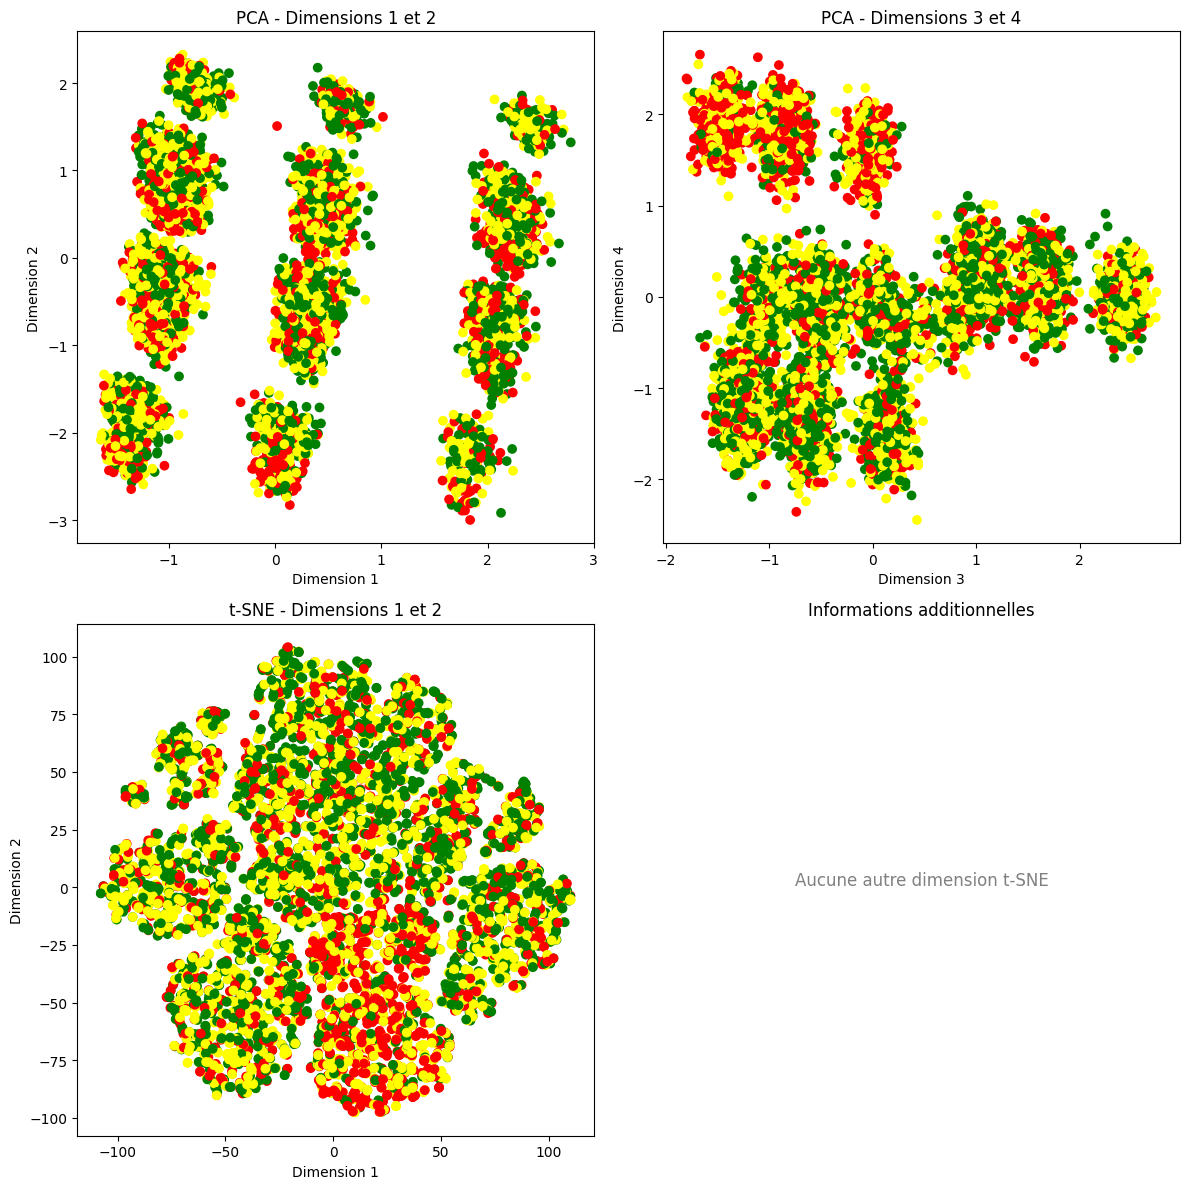

In [15]:

# Importation des biblioth√®ques n√©cessaires pour la visualisation et la r√©duction de dimensionnalit√© :
# matplotlib.pyplot pour cr√©er des graphiques, PCA pour la r√©duction de dimensionnalit√© lin√©aire,
# et TSNE pour une r√©duction de dimensionnalit√© non lin√©aire.
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# D√©finition d'une graine al√©atoire pour assurer la reproductibilit√© des r√©sultats
random_seed = 42
# D√©finition des labels et des couleurs pour chaque classe
labels = outputs_category
coordinates = inputs_standardized_df
color_dict = {"Faible": "green", "Mod√©r√©": "yellow", "√âlev√©": "red"}
color_vec = [color_dict[label] for label in labels]

# R√©duction de la dimensionnalit√© avec PCA
pca = PCA(n_components=4)  # On calcule les 4 premi√®res dimensions, tel que demand√© dans la consigne
print("D√©but de la r√©duction de la dimensionnalit√© avec PCA...")
pca_coords = pca.fit_transform(coordinates)
print("PCA termin√©e.")

# R√©duction de la dimensionnalit√© avec t-SNE en 2 dimensions.
#P.S : les 4 dimensions avec T-SNE avec la m√©thode "exact", prennent trop de temps √† s'ex√©cuter pour cet exercice ; nous limitons √† 2 dimensions.
print("D√©but de la r√©duction de la dimensionnalit√© avec t-SNE...")
tsne = TSNE(
    perplexity=5,  # Contr√¥le la balance entre les structures locales et globales
    n_components=2,  # R√©duction √† 2 dimensions
    learning_rate=200,  # Vitesse d'apprentissage pour acc√©l√©rer le processus
    init='pca',  # Initialisation avec PCA
    method='barnes_hut',  # Algorithme rapide pour grands ensembles
    n_jobs=-1,  # Utilise tous les c≈ìurs disponibles
    verbose=1,
    random_state=random_seed
)
# On sauvegarde des deux premi√®res dimensions
tsne_coords_2d = tsne.fit_transform(coordinates)
print("Transformation t-SNE termin√©e.")

# On s√©pare des deux dimensions en variables distinctes. Utile pour la partie 4 de la consigne !
tsne_dim1 = tsne_coords_2d[:, 0]  # Premi√®re dimension
tsne_dim2 = tsne_coords_2d[:, 1]  # Deuxi√®me dimension

# Cr√©ation de la figure et affichage des graphiques
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# PCA - Dimensions 1 et 2
axs[0, 0].scatter(pca_coords[:, 0], pca_coords[:, 1], c=color_vec)
axs[0, 0].set_title("PCA - Dimensions 1 et 2")
axs[0, 0].set_xlabel("Dimension 1")
axs[0, 0].set_ylabel("Dimension 2")

# PCA - Dimensions 3 et 4
axs[0, 1].scatter(pca_coords[:, 2], pca_coords[:, 3], c=color_vec)
axs[0, 1].set_title("PCA - Dimensions 3 et 4")
axs[0, 1].set_xlabel("Dimension 3")
axs[0, 1].set_ylabel("Dimension 4")

# t-SNE - Dimensions 1 et 2
axs[1, 0].scatter(tsne_coords_2d[:, 0], tsne_coords_2d[:, 1], c=color_vec)
axs[1, 0].set_title("t-SNE - Dimensions 1 et 2")
axs[1, 0].set_xlabel("Dimension 1")
axs[1, 0].set_ylabel("Dimension 2")

# On laisse le dernier graphique vide avec un petit message informatif
axs[1, 1].axis('off')
axs[1, 1].text(0.5, 0.5, "Aucune autre dimension t-SNE", ha='center', va='center', fontsize=12, color='gray')
axs[1, 1].set_title("Informations additionnelles")

plt.tight_layout()
plt.show()

# On affiche la variance expliqu√©e par les dimensions de la PCA.
explained_variance = pca.explained_variance_ratio_[:4]
print("Variance expliqu√©e par les premi√®res dimensions (PCA) :", explained_variance)




#**Commentaire 1.6 :**
#PCA
Concernant la variance expliqu√©e (inertie), par nos 4 premi√®res composantes de la PCA, nous remarquons qu'elles expliquent chacune une part tr√®s limit√©e de la variance de nos donn√©es d'entr√©e : 6,57%, 6,26%, 5,83%, et 5,35%. Ceci nous indique qu'il faudrait davantage de dimensions pour cerner l'information totale (ou du moins une bonne partie) de nos donn√©es d'entr√©e.

En outre, nous observons un regroupement en forme de grappes de nos points mais les classes de la variable cible ne sont pas bien s√©par√©es au sein de ces grappes. Ainsi, nous remarquons que les 4 premi√®res dimensions de la PCA ne permettent pas de bien diff√©rencier, ni de pr√©dire les classes de notre variable cible (les points rouge, jaunes et verts sont m√©lang√©s dans chacun des regroupements des points).  

Soulignons tout de fois un tr√®s l√©ger regroupement des points rouge (classe "Elev√©e) dans la partie sup√©rieure/gauche du graph des dimensions 3 et 4. Aussi, les points verts (classe "Faible") semblent se regrouper plut√¥t dans la partie inf√©rieure du graph des dimensions 3 et 4.

# T-SNE

Pour le T-SNE, nous observons sur le graph des deux premi√®res dimensions que les donn√©es d'entr√©es sont entass√©es en amas de points relativement bien form√©s. Toutefois, les trois couleurs de la variables cible sont pr√©sents dans chacun de ces amas de points et, √† vue d'oeil, assez uniform√©ment r√©partis dans ces groupes de points. Ainsi, des deux premi√®res dimensions du t-sne ne permettent pas une claire diff√©renciation des classes de notre variable cible.

Toutefois, il semble tout de m√™me qu'on observe une l√©g√®re tendance des points de classe "Faible" (en vert) √† se regrouper dans la partie sup√©rieure du graph, c'est-√†-dire pour les valeurs √©lev√©es sur l'axe verticale("dimension 2"). Aussi, les points rouge de la classe "Elev√©" semble se regrouper dans la partie inf√©rieure du graphique, c'est-√†-dire pour les valeurs faibles sur l'axe verticale ("dimension 2"). Bien que la s√©paration entre les classes ne soit pas nette, ces distributions sugg√®rent que la r√©duction de la dimensionalit√© avec les deux premi√®res dimensions du t-SNE permet tout de m√™me une l√©g√®re diff√©renciation des classes.





#**Partie 2 : Classification**

##2.1

In [16]:
# Importation de la fonction train_test_split pour diviser le jeu de donn√©es en ensembles d'entra√Ænement et de test
from sklearn.model_selection import train_test_split, GridSearchCV



# S√©parer les donn√©es en jeux d'entra√Ænement/validation et de test en utilisant mon output : "outputs_combined" et mes inputs "inputs_standardized_df"
#la taille du jeu de test comprend 20% de mes donn√©es
inputs_train_val, inputs_test, outputs_train_val, outputs_test = train_test_split(
    inputs_standardized_df, outputs_combined, test_size=0.2, stratify=outputs_combined, random_state=42
)

# V√©rification des formes pour chaque jeu de donn√©es
print("inputs_train_val shape:", inputs_train_val.shape)
print("inputs_test shape:", inputs_test.shape)
print("outputs_train_val shape:", outputs_train_val.shape)
print("outputs_test shape:", outputs_test.shape)

# Afficher quelques exemples pour v√©rifier l'int√©grit√© des jeux d'entra√Ænement et de test
print("\nPremi√®res lignes de inputs_train_val :")
print(inputs_train_val.head())

print("\nPremi√®res lignes de outputs_train_val :")
print(outputs_train_val.head())




Variance expliqu√©e par les premi√®res dimensions (PCA) : [0.06565482 0.06255638 0.0582921  0.05356961]
inputs_train_val shape: (5617, 23)
inputs_test shape: (1405, 23)
outputs_train_val shape: (5617,)
outputs_test shape: (1405,)

Premi√®res lignes de inputs_train_val :
           Age      CGPA  Financial_Stress  Semester_Credit_Load  Gender_Male  \
1899 -1.038850 -1.083980          0.320091              0.685960    -1.010307   
553   0.258604  1.040313          1.490453              1.374338    -1.010307   
5893 -0.260378 -1.014331          0.905272             -0.920256     0.989799   
5171 -0.779359  0.448297          0.320091             -0.920256    -1.010307   
2688 -0.260378  1.771627          1.490453             -0.231878    -1.010307   

      Course_Computer Science  Course_Engineering  Course_Law  Course_Medical  \
1899                -0.414131           -0.424462   -0.495679       -0.654299   
553                 -0.414131            2.355923   -0.495679       -0.654299   

Le jeu de donn√©e a bien √©t√© s√©par√© en jeu d'entrainement et de test (c.f. les "shape" ci-dessus) avec "inputs_train_val", "outputs_train_val", "inputs_test" et "outputs_test".

Ajoutons encore quelques v√©rifications pour voir si il n'y a pas de valeurs manquantes sur toutes les donn√©es d'entrainement et exportons "train_val_combined.csv" pour avoir un aper√ßu des mes inputs.

In [17]:

# R√©initialiser les indices pour s'assurer d'un alignement correct
inputs_train_val = inputs_train_val.reset_index(drop=True)
outputs_train_val = outputs_train_val.reset_index(drop=True)

# Concat√©ner de mani√®re synchronis√©e
train_val_combined = pd.concat([inputs_train_val, outputs_train_val], axis=1)

# V√©rifier les valeurs manquantes apr√®s la concat√©nation
print("Valeurs manquantes dans train_val_combined :")
print(train_val_combined.isna().sum())

# Exporter la table combin√©e
train_val_combined.to_csv("train_val_combined.csv", index=False)


Valeurs manquantes dans train_val_combined :
Age                            0
CGPA                           0
Financial_Stress               0
Semester_Credit_Load           0
Gender_Male                    0
Course_Computer Science        0
Course_Engineering             0
Course_Law                     0
Course_Medical                 0
Course_Others                  0
Relationship_Status_Married    0
Relationship_Status_Single     0
Family_History_Yes             0
Chronic_Illness_Yes            0
Residence_Type_On-Campus       0
Residence_Type_With Family     0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Counseling_Service_Use         0
Extracurricular_Involvement    0
Substance_Use                  0
Anxiety_Score                  0
dtype: int64


##2.2

Entrainons d√©sormais une r√©gression logistique (Softmax) avec comme param√®tres, les param√®tres par d√©faut de sklearn. Nous laisserons donc que les param√®tres par d√©faut lorsque nous initialisons le mod√®le et n'ajoutons pas d'autres param√®tres.
Ce premier mod√®le que nous entrainons sera notre baseline pour la suite, c'est-√†-dire qu'il servira de comparaison avec les autres mod√®les pour √©valuer si les autres mod√®les performent mieux, de fa√ßon similaire ou moins biens. Pour se faire, nous devons utiliser diff√©rentes mesures :
1. Exactitude ("accuracy") : Mesure le pourcentage de pr√©dictions correctes parmi toutes les pr√©dictions effectu√©es (positives et n√©gatives confondues)
2. Pr√©cision ("Precision") : Indique le pourcentage de pr√©dictions positives qui sont effectivement correctes.
3. Rappel ("Recall") : Indique le pourcentage d'observations positives r√©elles qui ont √©t√© correctement identifi√©es par le mod√®le.
4. F1_score : Moyenne harmonique de la pr√©cision et du rappel, utilis√©e pour √©valuer le compromis entre ces deux mesures.

In [18]:
# Importation de LogisticRegression pour construire un mod√®le de r√©gression logistique
from sklearn.linear_model import LogisticRegression

# Importation de fonctions d'√©valuation pour mesurer la performance du mod√®le
# make_scorer pour cr√©er des m√©triques personnalis√©es
# accuracy_score pour √©valuer l'exactitude
# precision_score pour √©valuer la pr√©cision
# recall_score pour √©valuer le rappel
from sklearn.metrics import make_scorer, accuracy_score, \
  precision_score, recall_score

In [19]:
#Nous ajoutons le F1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialiser le mod√®le de r√©gression logistique multinomiale avec softmax en prenant les param√®tres par d√©faut
logistic_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10000)

# Entra√Æner le mod√®le sur les donn√©es d'entra√Ænement/validation
logistic_reg.fit(inputs_train_val, outputs_train_val)

# Pr√©dictions sur les jeux d'entra√Ænement/validation et de test
train_val_pred = logistic_reg.predict(inputs_train_val)
test_pred = logistic_reg.predict(inputs_test)


# Calculer les m√©triques pour le jeu d'entra√Ænement/validation
# Utilisation de "weighted" pour prendre en compte le d√©s√©quilibre des classes,
# en pond√©rant les scores selon la fr√©quence de chaque classe
train_val_accuracy = accuracy_score(outputs_train_val, train_val_pred)
train_val_precision = precision_score(outputs_train_val, train_val_pred, average="weighted", zero_division=0)
train_val_recall = recall_score(outputs_train_val, train_val_pred, average="weighted", zero_division=0)
train_val_f1 = f1_score(outputs_train_val, train_val_pred, average="weighted", zero_division=0)

# Calculer les m√©triques pour le jeu de test
test_accuracy = accuracy_score(outputs_test, test_pred)
test_precision = precision_score(outputs_test, test_pred, average="weighted", zero_division=0)
test_recall = recall_score(outputs_test, test_pred, average="weighted", zero_division=0)
test_f1 = f1_score(outputs_test, test_pred, average="weighted", zero_division=0)

# Afficher les r√©sultats
print("M√©triques sur le jeu d'entra√Ænement/validation :")
print(f"Exactitude (Accuracy) : {train_val_accuracy:.4f}")
print(f"Pr√©cision (Precision) : {train_val_precision:.4f}")
print(f"Rappel (Recall) : {train_val_recall:.4f}")
print(f"Mesure F1 : {train_val_f1:.4f}")

print("\nM√©triques sur le jeu de test :")
print(f"Exactitude (Accuracy) : {test_accuracy:.4f}")
print(f"Pr√©cision (Precision) : {test_precision:.4f}")
print(f"Rappel (Recall) : {test_recall:.4f}")
print(f"Mesure F1 : {test_f1:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


M√©triques sur le jeu d'entra√Ænement/validation :
Exactitude (Accuracy) : 0.4365
Pr√©cision (Precision) : 0.4408
Rappel (Recall) : 0.4365
Mesure F1 : 0.4290

M√©triques sur le jeu de test :
Exactitude (Accuracy) : 0.4214
Pr√©cision (Precision) : 0.4261
Rappel (Recall) : 0.4214
Mesure F1 : 0.4140


Nos diff√©rents scores sont affich√©s.

Nous observons que notre mod√®le de r√©gression logistique avec les param√®tres par d√©faut = notre baseline, est capable de classer correctement environ 43.65% des instances sur l'ensemble d'entrainement/validation et 42.14% sur le jeu de test, quelle que soit la classe cible. Ainsi, bien que le mod√®le montre une g√©n√©ralisation relativement stable entre le jeu d'entrainement/validation et de test, il peine √† classifier correctement nos diff√©rentes classes.

En tenant compte de la fr√©quence de chaque classe (¬´ Faible ¬ª, ¬´ Mod√©r√© ¬ª, ¬´ √âlev√© ¬ª), le mod√®le de r√©gression logistique multinomiale montre qu'environ 44.08 % des pr√©dictions pour le jeu d'entra√Ænement correspondent effectivement √† la classe correcte. Pour le jeu de test, environ 42.61 % des pr√©dictions correspondent √† la classe correcte. La pr√©cision √©tant proche de l'exactitude, cela sugg√®re que le mod√®le n'est ni particuli√®rement biais√© en faveur d'une classe sp√©cifique ni extr√™mement pr√©cis.

Egalement calcul√© sur chaque classe et pond√©r√©, le mod√®le atteint un rappel de 0,4365, ce qui signifie qu'en moyenne, 43.65 % des observations de chaque classe sont correctement identifi√©es comme appartenant √† leur classe respective pour le jeu d'entrainement/validation. Pour l'ensemble de test, le rappel est de 0,4214, indiquant qu'environ 42.14 % des observations de chaque classe sont retrouv√©es correctement dans le jeu de test, toujours en tenant compte de la proportion de chaque classe. Comme le rappel est similaire √† l‚Äôexactitude, cela pourrait signifier que le mod√®le identifie bien les observations de chaque classe sans √™tre trop biais√© par une classe en particulier.

Enfin, le mod√®le indique un "f1_score" qui est √©gal √† 42.9% pour le jeu d'entrainement/validation et 41.4% pour le jeu de test. Comme les m√©triques du f1_score sont plus faibles que celles de la pr√©cision et du rappel, cela indique que le mod√®le ne parvient pas √† atteindre un compromis optimal entre identifier toutes les classes et les pr√©dires correctement sans erreurs pour le jeu d'entrainement/validation et test.




##2.3

In [20]:
#Importation des modules n√©cessaires pour l'algorithme KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
#Pour utiliser le mod√®le de SVM (Support Vector Machine) pour la classification
from sklearn.svm import SVC

[0.001      0.02726316 0.05352632 0.07978947 0.10605263 0.13231579
 0.15857895 0.18484211 0.21110526 0.23736842 0.26363158 0.28989474
 0.31615789 0.34242105 0.36868421 0.39494737 0.42121053 0.44747368
 0.47373684 0.5       ]
Entra√Ænement pour le kernel : Polynomial (degr√© 3)
Meilleur gamma pour Polynomial (degr√© 3): 0.027263157894736843
Meilleure exactitude de validation pour Polynomial (degr√© 3): 0.4077
Entra√Ænement pour le kernel : RBF
Meilleur gamma pour RBF: 0.001
Meilleure exactitude de validation pour RBF: 0.4145
Entra√Ænement pour le kernel : Sigmoid (tanh)
Meilleur gamma pour Sigmoid (tanh): 0.001
Meilleure exactitude de validation pour Sigmoid (tanh): 0.4130


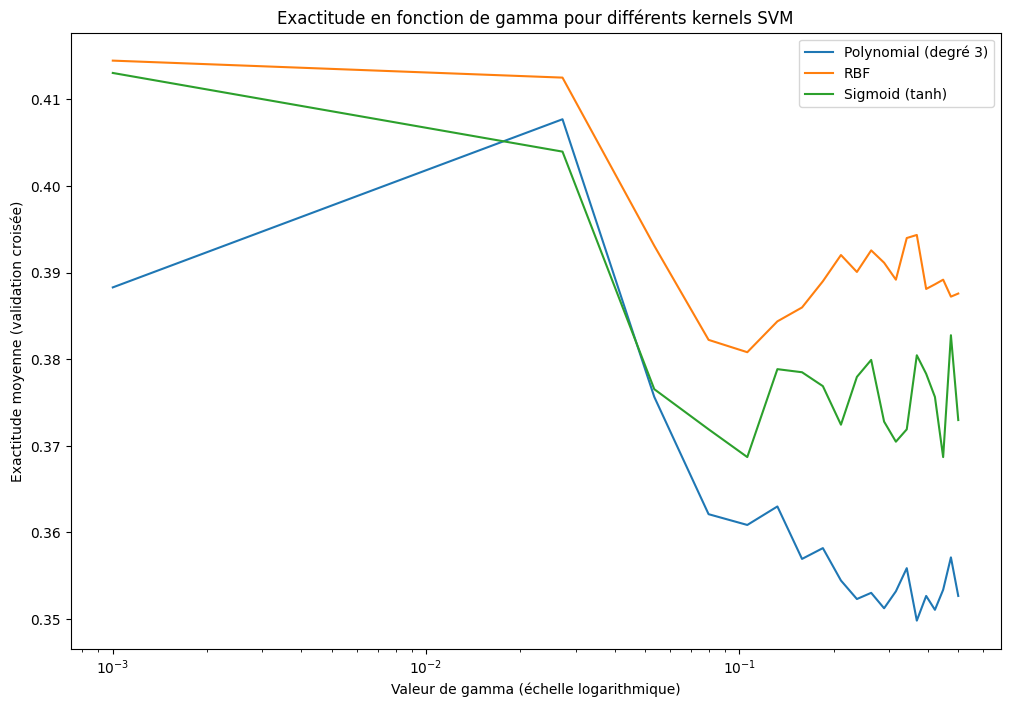

In [21]:
#Source : https://stackoverflow.com/questions/53784971/how-to-disable-convergencewarning-using-sklearn
from sklearn.exceptions import ConvergenceWarning
import warnings


# Nous d√©finissons une plage de valeurs pour le param√®tre gamma, r√©partie entre 0.001 et 0.5
# Cette plage sera utilis√©e pour optimiser les diff√©rents mod√®les SVM
gamma_values = np.linspace(0.001, 0.5, 20)
print(gamma_values)


# Fixer C √† 5 et le nombre maximal d'it√©rations pour SVC
C_value = 5
max_iter_value = 10000

#Ignorer les warnings de convergence, on aurait pu prendre un "max_iter_value" pour satisfaire pleinement les convergences
#mais le temps d'ex√©cution aurait √©t√© trop long pour respecter les 20min. de la consigne ! source :
warnings.filterwarnings("ignore", category=ConvergenceWarning)


#les diff√©rents kernels √† tester et leurs param√®tres
kernels = {
    "Polynomial (degr√© 3)": {"kernel": "poly", "degree": 3},
    "RBF": {"kernel": "rbf"},
    "Sigmoid (tanh)": {"kernel": "sigmoid"}
}


# Dictionnaire pour stocker les r√©sultats de chaque kernel
results = {}

# Boucle sur chaque kernel pour effectuer la recherche avec GridSearchCV
for kernel_name, kernel_params in kernels.items():
    print(f"Entra√Ænement pour le kernel : {kernel_name}")

    # D√©finir le mod√®le SVM avec le kernel sp√©cifique et les param√®tres g√©n√©raux d√©finis plus haut
    svm_model = SVC(
        C=C_value,
        kernel=kernel_params["kernel"],
        degree=kernel_params.get("degree", 3),
        max_iter=max_iter_value
    )

    # D√©finir les param√®tres pour GridSearchCV : recherche uniquement sur gamma
    param_grid = {"gamma": gamma_values}

    # Utiliser GridSearchCV pour tous les kernels avec 4 folds pour la validation crois√©e
    search = GridSearchCV(svm_model, param_grid=param_grid, cv=4, scoring="accuracy")

    ## Entra√Æner GridSearchCV sur les donn√©es d'entra√Ænement/validation pour identifier le meilleur gamma
    search.fit(inputs_train_val, outputs_train_val)

    # Extraire les meilleurs scores et les meilleures valeurs de gamma pour chaque kernel
    best_gamma = search.best_params_['gamma']
    best_score = search.best_score_
    results[kernel_name] = {"best_gamma": best_gamma, "best_score": best_score, "accuracy": search.cv_results_["mean_test_score"]}

    print(f"Meilleur gamma pour {kernel_name}: {best_gamma}")
    print(f"Meilleure exactitude de validation pour {kernel_name}: {best_score:.4f}")

# Visualisation des courbes d'exactitude en fonction de gamma pour chaque kernel
plt.figure(figsize=(12, 8))
for kernel_name, result in results.items():
    plt.plot(gamma_values, result["accuracy"], label=f"{kernel_name}")

plt.xscale("log")
plt.xlabel("Valeur de gamma (√©chelle logarithmique)")
plt.ylabel("Exactitude moyenne (validation crois√©e)")
plt.title("Exactitude en fonction de gamma pour diff√©rents kernels SVM")
plt.legend()
plt.show()





##2.4

#**Commentaire 2.4 (1)**

Le Support Vector Machine (SVM) est une m√©thode de classification supervis√©e qui tente de trouver une fronti√®re optimale s√©parant les classes en maximisant la distance entre les points de chaque classe les plus proches de cette fronti√®re. Le SVM utilise des kernels, des fonctions qui permettent de transformer les donn√©es dans un espace de dimension sup√©rieure pour rendre les classes plus facilement s√©parables (G√©ron, 2019).

Dans notre cas, en observant les courbes de l'exactitude en fonction des diff√©rentes valeurs de gamma pour chacun de nos kernels SVM, le kernel "RBF" (ùëò(xùëñ , xùëó ) = exp(‚àíùõæ‚à•xùëñ ‚àí xùëó ‚à•2)) avec une valeur gamma = 0.001 affiche la meilleure exactitude (=0.4145) pour nos diff√©rents mod√®les SVM. De mani√®re g√©n√©rale, nous pouvons en effet voir que la ligne orange, correspondant au mod√®le SVM avec le kernel "rbf", est le plus performant pour classer nos donn√©es d'entrainement/validation, quel que soit la valeur de gamma dans notre plage de valeurs. Nous retenons ainsi ce mod√®le.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# R√©cup√©rer le meilleur gamma pour le kernel "RBF" retenu √† partir des r√©sultats pr√©c√©demment calcul√©s
best_svm_gamma = results["RBF"]["best_gamma"]

# Chargement du mod√®le SVM avec le meilleur gamma et le kernel rbf
best_svm_model = SVC(C=5, kernel="rbf", gamma=best_svm_gamma, max_iter=10000, random_state=42)


# Entrainer le mod√®le sur les donn√©es d'entrainement/validation
best_svm_model.fit(inputs_train_val, outputs_train_val)

# Pr√©dictions sur les jeux d‚Äôentra√Ænement/validation et de test
svm_train_val_pred = best_svm_model.predict(inputs_train_val)
svm_test_pred = best_svm_model.predict(inputs_test)

# Calcul des m√©triques de notre meilleur mod√®le SVM (=RBF)
svm_train_val_accuracy = accuracy_score(outputs_train_val, svm_train_val_pred)
svm_train_val_precision = precision_score(outputs_train_val, svm_train_val_pred, average="weighted")
svm_train_val_recall = recall_score(outputs_train_val, svm_train_val_pred, average="weighted")
svm_train_val_f1 = f1_score(outputs_train_val, svm_train_val_pred, average="weighted")

svm_test_accuracy = accuracy_score(outputs_test, svm_test_pred)
svm_test_precision = precision_score(outputs_test, svm_test_pred, average="weighted")
svm_test_recall = recall_score(outputs_test, svm_test_pred, average="weighted")
svm_test_f1 = f1_score(outputs_test, svm_test_pred, average="weighted")


# Affichage des r√©sultats
print("\nComparaison entre le meilleur mod√®le SVM et la baseline\n")

print("=== Meilleur mod√®le SVM (=RBF) ===")
print(f"Exactitude (train/val) : {svm_train_val_accuracy:.4f}, (test) : {svm_test_accuracy:.4f}")
print(f"Pr√©cision (train/val) : {svm_train_val_precision:.4f}, (test) : {svm_test_precision:.4f}")
print(f"Rappel (train/val) : {svm_train_val_recall:.4f}, (test) : {svm_test_recall:.4f}")
print(f"Mesure F1 (train/val) : {svm_train_val_f1:.4f}, (test) : {svm_test_f1:.4f}")

print("\n=== Baseline (R√©gression Logistique Multinomiale) ===")
print(f"Exactitude (train/val) : {train_val_accuracy:.4f}, (test) : {test_accuracy:.4f}")
print(f"Pr√©cision (train/val) : {train_val_precision:.4f}, (test) : {test_precision:.4f}")
print(f"Rappel (train/val) : {train_val_recall:.4f}, (test) : {test_recall:.4f}")
print(f"Mesure F1 (train/val) : {train_val_f1:.4f}, (test) : {test_f1:.4f}")



Comparaison entre le meilleur mod√®le SVM et la baseline

=== Meilleur mod√®le SVM (=RBF) ===
Exactitude (train/val) : 0.4226, (test) : 0.4335
Pr√©cision (train/val) : 0.2677, (test) : 0.2774
Rappel (train/val) : 0.4226, (test) : 0.4335
Mesure F1 (train/val) : 0.3091, (test) : 0.3159

=== Baseline (R√©gression Logistique Multinomiale) ===
Exactitude (train/val) : 0.4365, (test) : 0.4214
Pr√©cision (train/val) : 0.4408, (test) : 0.4261
Rappel (train/val) : 0.4365, (test) : 0.4214
Mesure F1 (train/val) : 0.4290, (test) : 0.4140


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#**commentaire 2.4 (2)**

Les r√©sultats ci-dessus nous montre une comparaison entre les m√©triques de l'exactitude, de la pr√©cision, du rappel et du f1_score pour notre meilleur mod√®le SVM selon l'exactitude avec le kernel "RBF" (kernel retenu, c.f. commentaire 2.4(1)) et notre "baseline" qui est le mod√®le de r√©gression logistique avec les param√®tres par d√©faut. En comparant ces deux mod√®les, nous pouvons effectivement voir s'il y a eu des am√©lioration ou non selon les diff√©rentes m√©triques pour ces deux mod√®les sur le jeu d'entrainement/validation et de test :

Sur le jeu d'entra√Ænement/validation, le mod√®le SVM avec kernel "RBF" atteint une exactitude de 42.26 %, l√©g√®rement inf√©rieure √† celle de la baseline (43.65 %). Toutefois, sur le jeu de test, l'exactitude s'am√©liore l√©g√®rement √† 43.35 % et d√©passe l'exactitude de notre "baseline", ce qui indique que ce mod√®le pourrait √™tre int√©ressant √† utiliser plus tard dans ce travail pour classifier au mieux nos donn√©es.
Aussi, le rappel dans le jeu de test du mod√®le SVM (et similaire √† l'exactitude) est sup√©rieur √† notre baseline ; ceci indique une meilleure capacit√© de retrouver les observation de chaque classe dans les donn√©es de test.

Toutefois, la pr√©cision est nettement moins bonne (26.77 % pour l'entra√Ænement/validation et 27.74 % pour le test) que notre baseline (44.08% pour l'entra√Ænement/validation et 42.61% pour le test), indiquant que le SVM avec le kernel "RBF" n'arrive pas √† pr√©dire correctement certaines classes dans le jeu d'entrainement/validation et de test. En outre, il est int√©ressant d'observer le message d'erreur "Precision is ill-defined and being set to 0.0 in labels with no predicted samples."
, nous indiquant qu'une des classe n'arrive pas √† √™tre correctement pr√©dite dans notre mod√®le SVM avec le kernel "RBF" ; ceci pourrait expliquer sa mauvaise performance en comparaison de notre baseline. En ayant creus√© la question, j'ai d√©couvert gr√¢ce √† une matrice de confusion que c'√©tait notre classe minoritaire "Elev√©" qui n'√©tait pas pr√©dite par ce mod√®le.

Le f1_score du SVM est √©galement nettement moins performant pour le jeu d'entrainement/validation et sur le jeu de test que la baseline. Ceci pourrait s'expliquer par la mauvaise pr√©cision du mod√®le sur les donn√©es d'entrainement et de test.

Pour r√©sumer, notre baseline semble g√©n√©ralement meilleure sur nos diff√©rentes m√©triques et sur les donn√©es d'entrainement/validation. Sur les donn√©es de test, le mod√®le SVM est plus performant pour l'exactitude et le rappel et il serait int√©ressant de le rendre globalement plus performant que notre baseline si nous trouvons un moyen de r√©gler sa mauvaise pr√©cision et son mauvais f1_score (Nous verrons ceci aux points 4.3 et 4.4 de la consigne).






#**Partie 3 : Clustering**

Passons maintenant √† des m√©thodes de clustering qui vont permettre de segmenter nos donn√©es d'entr√©es standardis√©es sans utiliser les labels des classes (m√©thodes non-supervis√©es). Nous comparerons ensuite ces r√©sultats avec nos m√©thodes supervis√©es effectu√©es avant. Pour se faire nous allons utiliser deux m√©thodes de clustering :

1. Le Clustering Hi√©rarchique Agglom√©ratif (HAC) qui est une m√©thode permettant de regrouper nos donn√©es d'entr√©es de mani√®re hi√©rarchique en partant des points individuels et en les regroupant progressivement en clusters plus larges. Cette m√©thode est it√©rative √©tant donn√© qu'elle agr√®ge les points les plus proches puis recalcule √† chaque fois les distances  entre les nouveaux clusters et les autres points.

2. Le Gaussian Mixture Model (GMM) qui est une m√©thode de clustering probabiliste qui cherche √† mod√©liser la distribution des donn√©es comme une combinaison de plusieurs distributions normales. Pour se faire, le GMM attribue √† chaque point une probabilit√© d'appartenance √† chaque cluster en fonction des distributions normales.

##3.1

Nombre de groupes: 2, Score de Calinski-Harabasz: 350.3493
Nombre de groupes: 3, Score de Calinski-Harabasz: 362.2860
Nombre de groupes: 4, Score de Calinski-Harabasz: 376.1063
Nombre de groupes: 5, Score de Calinski-Harabasz: 389.4333
Nombre de groupes: 6, Score de Calinski-Harabasz: 402.1465
Nombre de groupes: 7, Score de Calinski-Harabasz: 380.4841
Nombre de groupes: 8, Score de Calinski-Harabasz: 361.5292
Nombre de groupes: 9, Score de Calinski-Harabasz: 336.5663
Nombre de groupes: 10, Score de Calinski-Harabasz: 311.5044
Nombre de groupes: 11, Score de Calinski-Harabasz: 289.3559
Nombre de groupes: 12, Score de Calinski-Harabasz: 271.1912


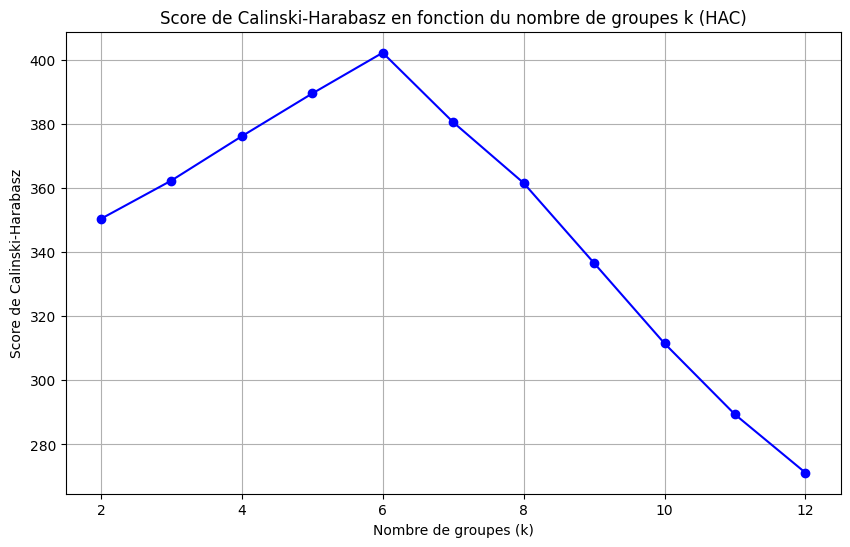

Meilleur nombre de groupes (k) selon le score de Calinski-Harabasz : 6


In [23]:
# Importation de la classe AgglomerativeClustering pour effectuer le clustering hi√©rarchique agglom√©ratif
from sklearn.cluster import AgglomerativeClustering
# Importation de la fonction calinski_harabasz_score pour √©valuer la qualit√© du clustering
from sklearn.metrics import calinski_harabasz_score


# prenons toutes nos variables d'entr√©es standardis√©es
inputs_standardized_hac = inputs_standardized_df

# D√©finir la plage des valeurs de k (nombre de clusters/groupes) √† tester
k_values = range(2, 13)
# Initialisation d'une liste pour stocker les scores de Calinski-Harabasz pour chaque valeur de k
calinski_harabasz_scores = []

# Calculer le score de Calinski-Harabasz pour chaque nombre de groupes
for k in k_values:
    # Appliquer le clustering hi√©rarchique agglom√©ratif pour chaque nombre de groupes (k)
    hac = AgglomerativeClustering(n_clusters=k)
    # Ajuster le mod√®le et obtenir les labels de cluster pour chaque point de donn√©es
    hac_labels = hac.fit_predict(inputs_standardized_hac)

    # Calculer le score de Calinski-Harabasz pour le clustering obtenu avec k clusters
    score = calinski_harabasz_score(inputs_standardized_hac, hac_labels)
    # Enregistrer le score de Calinski-Harabasz pour la valeur de k calcul√©e
    calinski_harabasz_scores.append(score)
    # Afficher le nombre de groupes et le score de Calinski-Harabasz pour avoir un suivi
    print(f"Nombre de groupes: {k}, Score de Calinski-Harabasz: {score:.4f}")

# Cr√©er une figure pour visualiser le score de Calinski-Harabasz en fonction du nombre de clusters k
plt.figure(figsize=(10, 6))
plt.plot(k_values, calinski_harabasz_scores, marker='o', color='b')
plt.xlabel("Nombre de groupes (k)")
plt.ylabel("Score de Calinski-Harabasz")
plt.title("Score de Calinski-Harabasz en fonction du nombre de groupes k (HAC)")
plt.grid(True)
plt.show()

# Trouver et afficher le meilleur k (celui avec le score Calinski-Harabasz le plus √©lev√©)
best_k_hac = k_values[np.argmax(calinski_harabasz_scores)]
print(f"Meilleur nombre de groupes (k) selon le score de Calinski-Harabasz : {best_k_hac}")


#**Commentaire 3.1**
Nous pouvons observer diff√©rents √©l√©ments ici. Le score "Calinski Harabasz" augmente au fur et √† mesure que le nombre de clusters passe de 2 √† 6, atteignant un pic √† k = 6 avec un score de 402.1465. Cela sugg√®re que, pour cette valeur de k, le mod√®le de clustering hi√©rarchique agglom√©ratif (HAC) forme des clusters bien s√©par√©s et compacts. Nous retenons donc k=6, comme valeur du nombre de groupe √† retenir.

 Toutefois, il faut faire attention √† cette analyse. En effet, ces r√©sultats ne permettent pas d'indiquer pour l'instant si les clusters correspondent √† nos classes cibles ("Faible", "Mod√©r√©", "Elev√©"). Nous utiliserons plus tard "Adjusted Mutual Information (AMI), "Homogeneity_score" et "completeness_score" pour savoir si le meilleur mod√®le de clustering retenu ici permet de correctement segmenter les donn√©es en fonction de nos classes cibles.

##3.2

Nombre de groupes: 2, Score de Calinski-Harabasz: 374.2706
Nombre de groupes: 3, Score de Calinski-Harabasz: 369.1509
Nombre de groupes: 4, Score de Calinski-Harabasz: 420.4442
Nombre de groupes: 5, Score de Calinski-Harabasz: 444.5612
Nombre de groupes: 6, Score de Calinski-Harabasz: 403.3790
Nombre de groupes: 7, Score de Calinski-Harabasz: 359.2972
Nombre de groupes: 8, Score de Calinski-Harabasz: 306.2737
Nombre de groupes: 9, Score de Calinski-Harabasz: 317.3127
Nombre de groupes: 10, Score de Calinski-Harabasz: 292.7185
Nombre de groupes: 11, Score de Calinski-Harabasz: 275.4326
Nombre de groupes: 12, Score de Calinski-Harabasz: 260.4805


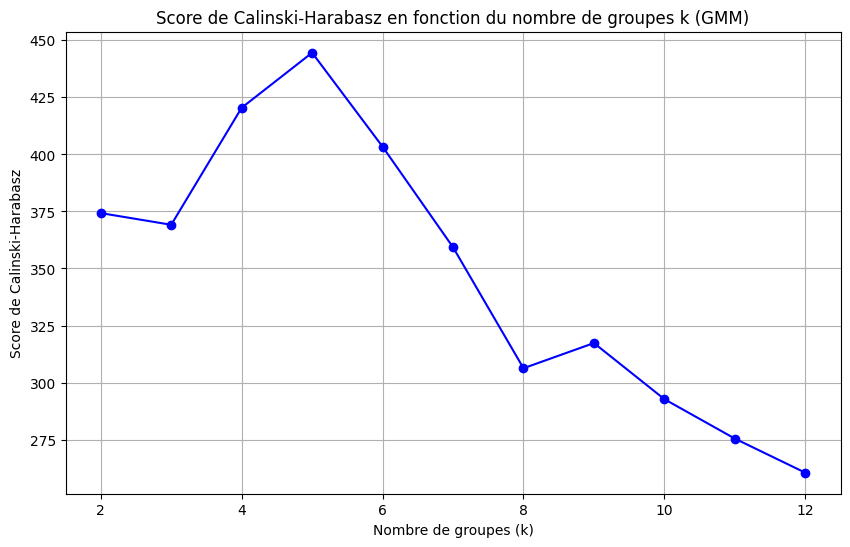

Meilleur nombre de groupes (k) pour GMM selon le score de Calinski-Harabasz : 5


In [24]:
from sklearn.preprocessing import StandardScaler
# Importation de la classe GaussianMixture depuis scikit-learn
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score

# prenons toutes nos variables d'entr√©es standardis√©es
inputs_standardized_GMM = inputs_standardized_df

# D√©finir la plage des valeurs de k (nombre de clusters/groupes) √† tester
k_values = range(2, 13)
# Initialisation d'une liste pour stocker les scores de Calinski-Harabasz pour chaque valeur de k
calinski_harabasz_scores_gmm = []

# Calculer le score de Calinski-Harabasz pour chaque nombre de groupes
for k in k_values:
    # Cr√©ation du mod√®le GMM pour k clusters
    gmm = GaussianMixture(n_components=k, random_state=42)
    # Ajuster le mod√®le et obtenir les labels de cluster pour chaque point de donn√©es
    gmm_labels = gmm.fit_predict(inputs_standardized_GMM)

    # Calculer le score de Calinski-Harabasz pour le clustering obtenu avec k clusters
    score = calinski_harabasz_score(inputs_standardized_GMM, gmm_labels)
    # Enregistrer le score de Calinski-Harabasz pour la valeur de k calcul√©e
    calinski_harabasz_scores_gmm.append(score)
    # Afficher le nombre de groupes et le score de Calinski-Harabasz pour avoir un suivi
    print(f"Nombre de groupes: {k}, Score de Calinski-Harabasz: {score:.4f}")

# Cr√©er une figure pour visualiser le score de Calinski-Harabasz en fonction du nombre de clusters k
plt.figure(figsize=(10, 6))
plt.plot(k_values, calinski_harabasz_scores_gmm, marker='o', color='b')
plt.xlabel("Nombre de groupes (k)")
plt.ylabel("Score de Calinski-Harabasz")
plt.title("Score de Calinski-Harabasz en fonction du nombre de groupes k (GMM)")
plt.grid(True)
plt.show()

# Trouver et afficher le meilleur k (celui avec le score Calinski-Harabasz le plus √©lev√©)
best_k_gmm = k_values[np.argmax(calinski_harabasz_scores_gmm)]
print(f"Meilleur nombre de groupes (k) pour GMM selon le score de Calinski-Harabasz : {best_k_gmm}")


#**commentaire 3.2**
Le score atteint son maximum √† k=5, avec une valeur de 444.5612. Cela sugg√®re que le mod√®le GMM forme des clusters de meilleure qualit√© avec cinq groupes, en termes de s√©paration et de compacit√©. Par cons√©quent, k=5 est consid√©r√© comme le nombre optimal de clusters selon cette mesure. Nous retenons donc k=5, comme valeur du nombre de groupe √† retenir.

 Toutefois, comme pour le HAC, il faut faire attention √† cette analyse. En effet, ces r√©sultats ne permettent pas d'indiquer pour l'instant si les clusters correspondent √† nos classes cibles ("Faible", "Mod√©r√©", "Elev√©"). Nous utiliserons plus tard "Adjusted Mutual Information (AMI), "Homogeneity_score" et "completeness_score" pour savoir si le meilleur mod√®le de clustering retenu ici permet de correctement segmenter les donn√©es en fonction de nos classes cibles.

##3.3

In [25]:
# Importation des m√©triques pour √©valuer la qualit√© des clusters
from sklearn.metrics import adjusted_mutual_info_score, homogeneity_score, completeness_score

# Appliquer le meilleur k (retenu pr√©c√©demment pour HAC et GMM) pour calculer les scores AMI, homog√©n√©it√©, et compl√©tude
best_k_hac = 6
best_k_gmm = 5

# Calculer les labels en utilisant le clustering hi√©rarchique agglom√©ratif avec le meilleur k
hac = AgglomerativeClustering(n_clusters=best_k_hac)
hac_labels = hac.fit_predict(inputs_standardized_df)

# Calculer les labels en utilisant GMM avec le meilleur k
gmm = GaussianMixture(n_components=best_k_gmm, random_state=42)
gmm_labels = gmm.fit_predict(inputs_standardized_GMM)

# Calcul des m√©triques pour HAC
#Adjusted Mutual Information pour HAC
hac_ami = adjusted_mutual_info_score(outputs_combined, hac_labels)
#homogeneity_score pour HAC
hac_homog = homogeneity_score(outputs_combined, hac_labels)
# completeness_score pour HAC
hac_comp = completeness_score(outputs_combined, hac_labels)

# Calcul des m√©triques pour GMM
gmm_ami = adjusted_mutual_info_score(outputs_combined, gmm_labels)
#homogeneity_score pour GMM
gmm_homog = homogeneity_score(outputs_combined, gmm_labels)
#completeness_score pour GMM
gmm_comp = completeness_score(outputs_combined, gmm_labels)

# Affichage des r√©sultats
print(f"Clustering Hi√©rarchique Agglom√©ratif (HAC) avec k={best_k_hac} :")
print(f"- Adjusted Mutual Information (AMI) : {hac_ami:.4f}")
print(f"- Homog√©n√©it√© : {hac_homog:.4f}")
print(f"- Compl√©tude : {hac_comp:.4f}")

print(f"\nGaussian Mixture Model (GMM) avec k={best_k_gmm} :")
print(f"- Adjusted Mutual Information (AMI) : {gmm_ami:.4f}")
print(f"- Homog√©n√©it√© : {gmm_homog:.4f}")
print(f"- Compl√©tude : {gmm_comp:.4f}")


Clustering Hi√©rarchique Agglom√©ratif (HAC) avec k=6 :
- Adjusted Mutual Information (AMI) : 0.0245
- Homog√©n√©it√© : 0.0308
- Compl√©tude : 0.0210

Gaussian Mixture Model (GMM) avec k=5 :
- Adjusted Mutual Information (AMI) : 0.0315
- Homog√©n√©it√© : 0.0379
- Compl√©tude : 0.0276


#**Commentaire 3.3**

Revenons sur nos diff√©rentes m√©triques obtenues.
1. L'AMI mesure la similarit√© entre les clusters pr√©dits et les vraies classes cibles ("Faible", "Mod√©r√©" et "Elev√©"), en tenant compte du hasard. Ici, les r√©sultats de AMI pour le GMM et HAC sont relativement faibles (0.0245 pour HAC et 0.0315 pour GMM). Cela indique que les clusters obtenus avec le meilleur k ne correspondent que tr√®s peu aux classes cibles. La quantit√© d'information partag√©e entre les deux partitions (clusters pr√©dits par GMM/HAC et les classes cibles) est faible et les clusters form√©s par GMM et HAC (tr√®s proche de 0) seraient presque aussi informatifs qu'une partition al√©atoire (G√©ron, 2019). Autrement dit, les regroupements obtenus avec le meilleur k n'apportent que tr√®s peu d'information sur les classes d'origine.

2. L'homog√©n√©it√© va nous permettre de dire √† quel point les clusters form√©s par HAC et GMM avec le meilleur k sont compos√©s d'√©l√©ments d'une m√™me classe cible. Comme les r√©sultats sont tr√®s faibles pour HAC et GMM (0.0308 pour HAC et 0.0379 pour GMM), il semble que les classes cibles sont m√©lang√©es au sein des clusters

3. La compl√©tude mesure dans quelle mesure tous les √©l√©ments d‚Äôune m√™me classe cible sont regroup√©s dans un m√™me cluster. Les scores bas obtenus pour nos "meilleurs" partitions GMM et HAC (0.0210 pour HAC et 0.0276 pour GMM) indiquent que les √©l√©ments d'une m√™me classe sont dispers√©s dans plusieurs clusters.



##3.4

In [26]:
from sklearn.metrics import adjusted_mutual_info_score

# Meilleur mod√®le bas√© sur le score AMI entre HAC et GMM
if gmm_ami > hac_ami:
    best_clustering_labels = gmm_labels
    best_k = best_k_gmm
    best_method = "GMM"
else:
    best_clustering_labels = hac_labels
    best_k = best_k_hac
    best_method = "HAC"

#affichez la m√©thode retenue en fonction du meilleur AMI entre HAC et GMM
print(f"Meilleure m√©thode de clustering retenue : {best_method} avec k={best_k}")

# Nous refaisons le calcul du AMI pour la m√©thode retenue sur toutes les donn√©es
best_clustering_ami = adjusted_mutual_info_score(outputs_combined, best_clustering_labels)
print(f"AMI pour la m√©thode de clustering {best_method} avec toutes les donn√©es : {best_clustering_ami:.4f}")

# AMI pour la baseline (r√©gression logistique multinomiale)
logistic_ami = adjusted_mutual_info_score(outputs_combined, logistic_reg.predict(inputs_standardized_df))

# AMI pour le mod√®le SVM
svm_ami = adjusted_mutual_info_score(outputs_combined, best_svm_model.predict(inputs_standardized_df))

# Affichage des r√©sultats pour avoir une approche comparative
print("\nComparaison des AMI :")
print(f"- M√©thode de clustering {best_method} : AMI = {best_clustering_ami:.4f}")
print(f"- Baseline = R√©gression Logistique Multinomiale) : AMI = {logistic_ami:.4f}")
print(f"- Meilleur model retenu (point 2.4) SVM : AMI = {svm_ami:.4f}")


Meilleure m√©thode de clustering retenue : GMM avec k=5
AMI pour la m√©thode de clustering GMM avec toutes les donn√©es : 0.0315

Comparaison des AMI :
- M√©thode de clustering GMM : AMI = 0.0315
- Baseline = R√©gression Logistique Multinomiale) : AMI = 0.0383
- Meilleur model retenu (point 2.4) SVM : AMI = 0.0516


#**commentaire 3.4**

Le meilleur mod√®le de clustering retenu en comparant le score AMI (avec leurs meilleurs k) est GMM. Toutefois, le score de 0.035 de ce mod√®le reste tr√®s bas, indiquant peu de correspondances entre les clusters cr√©√©s par ce mod√®le et les classes cibles du score d'anxi√©t√©.

Nous observons que notre baseline (soit la r√©gression logistique multinomiale) fait mieux, avec un score AMI de 0.0385. Ceci indique une l√©g√®re am√©lioration mais les classes pr√©dites par la baseline ne permettent toutefois pas une bonne correspondance (similarit√©) avec les classes cibles. En d'autres termes, les labels pr√©dits par la baseline et les labels r√©els ne coincident que tr√®s peu (en tenant compte des variations al√©atoires).

Enfin, les r√©sultats montrent que le SVM avec le kernel "RBF" est finalement le "meilleur" mod√®le parmi les trois pour capturer la structure des classes cibles dans les donn√©es (0.0516). Bien que ce score reste relativement bas, il indique une meilleure correspondance entre les pr√©dictions du SVM et les classes r√©elles comparativement aux autres mod√®les. Il semble que la non-lin√©arit√© de ce mod√®le permet donc une meilleur captation de la complexit√© de nos classes cibles.

De mani√®re g√©n√©rale, les classes de la variable cible (Anxiety_score) semblent √™tre difficile √† cerner pour nos diff√©rents mod√®les. Ces score AMI faibles et proches de 0 appuie cet argument et montre leur difficult√© √† bien distinguer les classes cibles.

D√©sormais, nous pouvons passer aux m√©thodes mixtes :

#**Partie 4 : M√©thode mixte**

##4.1 et 4.2

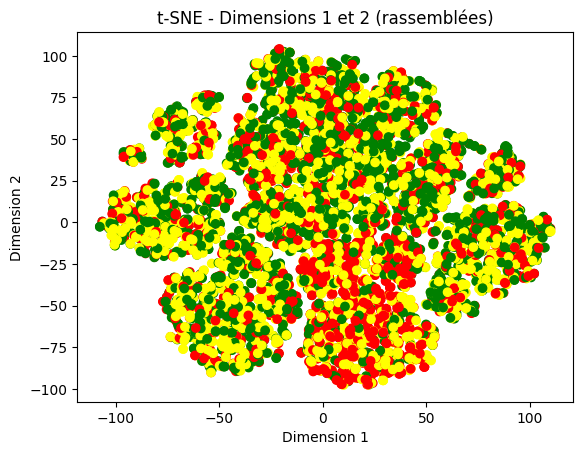

In [27]:
# Cr√©ation d'un DataFrame pour plus de clart√© dans la manipulation des donn√©es,
#en s√©parant la dimension 1 et la dimension 2 de notre t_sne calcul√© dans le point 1.6 du notebook
tsne_df = pd.DataFrame({'Dimension 1': tsne_dim1, 'Dimension 2': tsne_dim2, 'Label': labels})

# Rappel du point 1.6 du notebook : Visualisation pour v√©rifier la s√©paration des dimensions de nos deux variables.
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=color_vec)
plt.title("t-SNE - Dimensions 1 et 2 (rassembl√©es)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()




Nous avons choisi de prendre les deux premi√®res dimensions du t-sne pour nos m√©thodes mixtes apr√®s avoir compar√© les deux premi√®res dimensions du t-SNE et du PCA (c.f. point 1.6). Il en r√©sulte, selon les affichages (c.f. 1.6), une "meilleure" distinction des classes √† pr√©dire dans les deux premi√®res dimensions du t-SNE que dans la PCA. Notre principal argument est le fait qu'il existe une zone avec beaucoup de points rouges rassembl√©s dans l'affichage du t-SNE correspondant √† la classe "Elev√©" (c.f. les valeurs de 0 √† -100 de la dimension 2 de l'axe vertical). Les 2 premi√®res dimensions du PCA, au contraire, n'affiche aucune s√©paration claire des classes cibles.

En outre, concernant la m√©thode que nous souhaitons utiliser et qui nous semble la plus performante, nous avons vu pr√©c√©demment que la baseline (r√©gression logistique multinomiale) et le SVM avec le kernel "RBF" √©taient tous les deux des mod√®les avec les meilleures performances (c.f. commentaire 2.4). Toutefois, nous avons discut√© de leurs diff√©rences de performance : pour le SVM, kernel "RBF", l'accuracy et le rappel sur les donn√©es de test √©taient plus performant que la baseline. Au contraire, la baseline √©tait plus performante pour la pr√©cision et le f1_score. A partir de ces observations, nous d√©cidons ici d'utiliser comme mod√®le le plus performant le SVM, kernel "RBF" en partant de l'id√©e qu'en prenant comme inputs les deux premi√®res dimensions du t-SNE, ceci permettrait d'am√©liorer la pr√©cision et le f1_score et ainsi devenir notre meilleur mod√®le sur les 4 m√©triques.

Pour v√©rifier ceci, nous avons test√© √† la fin du notebook une r√©gression logistique multinomiale optimis√©e, avec comme inputs les dimensions 1 et 2 du t-SNE, pour v√©rifier si notre hypoth√®se fonctionne et si le SVM kernel "RBF" (en m√©thode mixte) est effectivement notre meilleur mod√®le.

p.s. : cette explication correspond au cheminement, √† ma r√©flexion it√©rative utilis√©e dans mon code. J'aurais pu garder uniquement le meilleur mod√®le et ne pas vous montrer la comparaison avec la r√©gression logistique en m√©thode mixte, mais il me semblait pertinent de vous expliquez comment j'en suis arriv√© √† choisir le mod√®le SVM, kernel "RBF" comme meilleur mod√®le.

##4.3

In [28]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# S√©paration du jeu de donn√©es en entra√Ænement/validation et test en integrant
#les deux premi√®res dimensions du t-sne comme variables d'entr√©es
coords_train_val, coords_test, labels_train_val, labels_test = train_test_split(
    tsne_df[['Dimension 1', 'Dimension 2']], outputs_combined, test_size=0.2, stratify=labels, random_state=42
)

# Param√®tres √† optimiser pour la recherche sur grille avec SVM avec kernel "RBF" = notre meilleur m√©thode retenue
param_grid = {'C': np.linspace(2, 10, 5), 'gamma': np.linspace(0.001, 1, 10), 'kernel': ['rbf']}
svm = SVC(max_iter=10000)

# Recherche sur grille avec toutes les m√©triques, refit sur 'accuracy' pour chercher √† obtenir
#un mod√®le pr√©disant au mieux nos diff√©rentes classes
grid_search = GridSearchCV(svm, param_grid, cv=4, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], refit="accuracy", verbose=1, n_jobs=-1)
grid_search.fit(coords_train_val, labels_train_val)

# Affichage des meilleurs hyperparam√®tres pour obtenir le "meilleur" mod√®le SVM, kernel "RBF"
print("Meilleurs hyperparam√®tres : ", grid_search.best_params_)
best_svm = grid_search.best_estimator_

# Pr√©dictions et √©valuation sur les ensembles d'entra√Ænement/validation et de test
train_val_pred = best_svm.predict(coords_train_val)
test_pred = best_svm.predict(coords_test)

# Calcul des m√©triques pour le SVM
train_val_accuracy = accuracy_score(labels_train_val, train_val_pred)
train_val_precision = precision_score(labels_train_val, train_val_pred, average="weighted")
train_val_recall = recall_score(labels_train_val, train_val_pred, average="weighted")
train_val_f1 = f1_score(labels_train_val, train_val_pred, average="weighted")

test_accuracy = accuracy_score(labels_test, test_pred)
test_precision = precision_score(labels_test, test_pred, average="weighted")
test_recall = recall_score(labels_test, test_pred, average="weighted")
test_f1 = f1_score(labels_test, test_pred, average="weighted")

print("\n=== R√©sultats du SVM avec les deux premi√®res dimensions du t-SNE ===")
print(f"Exactitude (train/val) : {train_val_accuracy:.4f}, (test) : {test_accuracy:.4f}")
print(f"Pr√©cision (train/val) : {train_val_precision:.4f}, (test) : {test_precision:.4f}")
print(f"Rappel (train/val) : {train_val_recall:.4f}, (test) : {test_recall:.4f}")
print(f"Mesure F1 (train/val) : {train_val_f1:.4f}, (test) : {test_f1:.4f}")




Fitting 4 folds for each of 50 candidates, totalling 200 fits
Meilleurs hyperparam√®tres :  {'C': 8.0, 'gamma': 0.001, 'kernel': 'rbf'}

=== R√©sultats du SVM avec les deux premi√®res dimensions du t-SNE ===
Exactitude (train/val) : 0.4518, (test) : 0.4278
Pr√©cision (train/val) : 0.4568, (test) : 0.4331
Rappel (train/val) : 0.4518, (test) : 0.4278
Mesure F1 (train/val) : 0.4454, (test) : 0.4203


#**Commentaire 4.3**

Pour rappel, dans le commentaire 2.4 du notebook, nous avions dit ceci : "*Pour r√©sumer, notre baseline [r√©gression logistique multinomiale] semble g√©n√©ralement meilleur pour nos diff√©rentes m√©triques sur les donn√©es d'entrainement/validation. Sur les donn√©es de test, le mod√®le SVM [avec kernel "RBF"] est plus performant pour l'exactitude et le rappel et il serait int√©ressant de le rendre globalement plus performant que notre baseline si nous trouvons un moyen de r√©gler sa mauvaise pr√©cision et son mauvais f1_score (Nous verrons ceci aux points 4.3 et 4.4 de la consigne)*"

Nous observons donc ici que le mod√®le SVM avec Kernel "RBF" , avec les 2 premi√®res dimensions du t-sne et avec les meilleurs param√®tres C=8 et gamma=0.001 s√©lectionn√©s, permet en effet d'avoir une meilleure pr√©cision et un meilleur f1_score que ce que nous avions observ√© avec les inputs originaux (c.f. commentaire 2.4):

SVM "RBF" avec inputs initiaux (commentaire 2.4) :
- pr√©cision : (train/val) : 0.2677, (test) : 0.2774

- f1_score : (train/val) : 0.3091, (test) : 0.3159

SVM "RBF" avec inputs dimensions 1 et 2 (t-SNE):
- pr√©cision : (train/val) : 0.4568, (test) : 0.4331

- f1_score : (train/val) : 0.4454, (test) : 0.4203

La m√©thode mixte a donc permi d'am√©liorer ces deux m√©triques. Ainsi, en consid√©rant ces am√©liorations, le mod√®le SVM avec kernel "RBF" et avec les dimensions 1 et 2 du t-SNE, permet une meilleur pr√©diction de nos classes cibles sur les 4 m√©triques en comparaison avec la baseline qui √©tait initialement (c.f. commentaire 2.4), notre meilleur mod√®le.

 Pour comparer:

 === Baseline (R√©gression Logistique Multinomiale) avec inputs initiaux ===
- Exactitude (train/val) : 0.4365, (test) : 0.4214
- Pr√©cision (train/val) : 0.4408, (test) : 0.4261
- Rappel (train/val) : 0.4365, (test) : 0.4214
- Mesure F1 (train/val) : 0.4290, (test) : 0.4140


=== R√©sultats du SVM avec les deux premi√®res dimensions du t-SNE comme inputs ===
- Exactitude (train/val) : 0.4518, (test) : 0.4278
- Pr√©cision (train/val) : 0.4568, (test) : 0.4331
- Rappel (train/val) : 0.4518, (test) : 0.4278
- Mesure F1 (train/val) : 0.4454, (test) : 0.4203

Nous observons de meilleurs r√©sultats pour le SVM "RBF" (avec dimensions 1 et 2 du t-SNE) sur toutes les m√©triques, que ce soit pour les donn√©es d'entrainement ou de test.

Tra√ßons maintenant les fronti√®res de d√©cision de notre m√©thode s√©lectionn√©e : mod√®le SVM, avec kernel "RBF" avec comme inputs les dimensions 1 et 2 du t-SNE :

##4.4

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


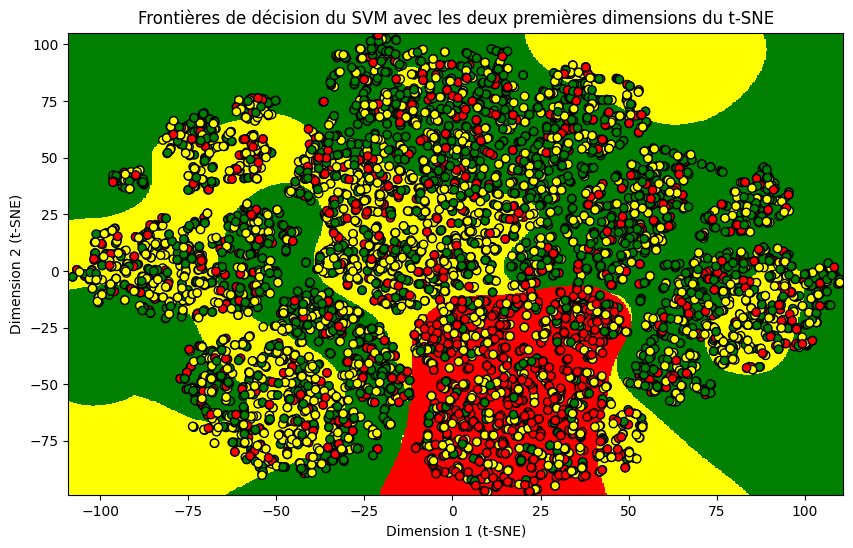

In [29]:
#Importation de ListedColormap depuis matplotlib.colors, qui permet de d√©finir des couleurs personnalis√©es pour les classes
from matplotlib.colors import ListedColormap


# D√©finition des couleurs pour chaque classes cible
color_dict = {"Faible": "green", "Mod√©r√©": "yellow", "√âlev√©": "red"}
mesh_cmap = ListedColormap([color_dict["Faible"], color_dict["Mod√©r√©"], color_dict["√âlev√©"]])

# D√©finition de la taille de la grille pour visualiser les fronti√®res de d√©cision
mesh_size = 0.4 #nous r√©duisons l√©g√®rement le temps d'ex√©cution en passant de 0.1 √† 0.3
x_min, x_max = tsne_df['Dimension 1'].min() - 1, tsne_df['Dimension 1'].max() + 1
y_min, y_max = tsne_df['Dimension 2'].min() - 1, tsne_df['Dimension 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_size), np.arange(y_min, y_max, mesh_size))


# Pr√©dictions pour chaque point de la grille
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = best_svm.predict(grid_points)

# Convertir les labels de classe en valeurs num√©riques pour correspondre aux couleurs du graphique
label_mapping = {'Faible': 0, 'Mod√©r√©': 1, '√âlev√©': 2}
Z_numeric = np.vectorize(label_mapping.get)(Z)
Z_numeric = Z_numeric.reshape(xx.shape)

# Cr√©ation du graphique avec les fronti√®res de d√©cision et les points
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z_numeric, cmap=mesh_cmap, shading='auto')

# Utilisation de `color_vec` pour colorier les points correctement
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=color_vec, edgecolor='k')

# Ajout des labels et du titre
plt.xlabel("Dimension 1 (t-SNE)")
plt.ylabel("Dimension 2 (t-SNE)")
plt.title("Fronti√®res de d√©cision du SVM avec les deux premi√®res dimensions du t-SNE")
plt.show()


Les fronti√®res de d√©cision cr√©√©es √† partir de notre meilleur mod√®le montrent diff√©rentes zones r√©parties en trois couleurs: la zone jaune, la zone verte, et la zone rouge. Chacune de ces zones repr√©sente une classe cible de la variable "Anxiety_score" ("Faible" pour la couleur verte, "Mod√©r√©" pour la couleur jaune, et "√âlev√©" pour la couleur rouge en fonction des couleurs respectives).
On observe des poches o√π les points d'une m√™me couleur sont bien concentr√©s et correspondent √† la couleur de la zone (par exemple la partie rouge), ce qui signifie que le mod√®le parvient √† identifier ces groupes avec une pr√©cision raisonnable. Cependant, dans d'autres r√©gions, les points de couleurs diff√©rentes se trouvent dans une m√™me zone de d√©cision (la couleur majoritaire des point est difficile √† cerner), ce qui refl√®te les erreurs de classification ou les difficult√©s du mod√®le √† bien s√©parer les classes dans l'espace repr√©sent√© par les deux premi√®res dimensions du t-SNE.

Pour aller plus loin (en plus de la consigne) et pour montrer le processus it√©ratif que j'ai effectu√© pour s√©lectionner mon meilleur mod√®le, il est int√©ressant de refaire la m√™me d√©marche (m√©thode mixte) mais cette fois-ci avec le mod√®le de notre baseline  (r√©gression logistique multinomiale) en optimisant les param√®tres pour vous montrer qu'en plus des m√©triques (rappel, pr√©cision, accuracy et f1_score) pr√©sent√©es ci-dessous, les fronti√®res de d√©cision cr√©√©es par notre baseline sont moins bonnes que notre meilleur mod√®le (SVM, kernel "RBF"). Ceci a √©t√© un argument suppl√©mentaire pour choisir comme meilleur mod√®le le SVM, kernel "RBF" avec comme inputs les deux premi√®res dimensions du t-SNE.  




In [30]:
# D√©finition des hyperparam√®tres pour la recherche sur grille
params = np.linspace(0.001, 1, 30)
param_dict = {
    'C': params,
}
k = 5


In [31]:
# S√©paration du jeu de donn√©es en entra√Ænement/validation et test
coords_train_val, coords_test, labels_train_val, labels_test = train_test_split(
    tsne_df[['Dimension 1', 'Dimension 2']], outputs_combined, test_size=0.2, stratify=labels, random_state=42
)

In [32]:
# Initialisation du mod√®le de r√©gression logistique multinomiale
logistic_reg = LogisticRegression(max_iter=10000, multi_class="multinomial", solver="lbfgs")

# Recherche sur grille avec validation crois√©e
grid_search = GridSearchCV(logistic_reg, param_dict, cv=k, scoring=['accuracy', 'precision_weighted', 'recall_weighted'],
                           verbose=1, n_jobs=-1, refit='accuracy')
grid_search.fit(coords_train_val, labels_train_val)

# Affichage des meilleurs hyperparam√®tres
print("Meilleurs hyperparam√®tres : ", grid_search.best_params_)

# Utilisation du mod√®le avec les meilleurs hyperparam√®tres
best_logistic_reg = grid_search.best_estimator_

# Pr√©dictions sur les ensembles d'entra√Ænement/validation et de test
train_val_pred = best_logistic_reg.predict(coords_train_val)
test_pred = best_logistic_reg.predict(coords_test)

# Calcul des m√©triques pour l'ensemble d'entra√Ænement/validation
train_val_accuracy = accuracy_score(labels_train_val, train_val_pred)
train_val_precision = precision_score(labels_train_val, train_val_pred, average="weighted")
train_val_recall = recall_score(labels_train_val, train_val_pred, average="weighted")
train_val_f1 = f1_score(labels_train_val, train_val_pred, average="weighted")

# Calcul des m√©triques pour l'ensemble de test
test_accuracy = accuracy_score(labels_test, test_pred)
test_precision = precision_score(labels_test, test_pred, average="weighted")
test_recall = recall_score(labels_test, test_pred, average="weighted")
test_f1 = f1_score(labels_test, test_pred, average="weighted")

# Affichage des r√©sultats
print("\n=== R√©sultats de la r√©gression logistique multinomiale avec dimensions 1 et 2 du t-SNE ===")
print(f"Exactitude (train/val) : {train_val_accuracy:.4f}, (test) : {test_accuracy:.4f}")
print(f"Pr√©cision (train/val) : {train_val_precision:.4f}, (test) : {test_precision:.4f}")
print(f"Rappel (train/val) : {train_val_recall:.4f}, (test) : {test_recall:.4f}")
print(f"Mesure F1 (train/val) : {train_val_f1:.4f}, (test) : {test_f1:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs hyperparam√®tres :  {'C': 0.035448275862068966}

=== R√©sultats de la r√©gression logistique multinomiale avec dimensions 1 et 2 du t-SNE ===
Exactitude (train/val) : 0.4020, (test) : 0.4057
Pr√©cision (train/val) : 0.3944, (test) : 0.5600
Rappel (train/val) : 0.4020, (test) : 0.4057
Mesure F1 (train/val) : 0.3373, (test) : 0.3456


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


En comparaison avec notre meilleur mod√®le (SVM avec Kernel "RBF"), nous voyons que seule la pr√©cision sur les donn√©es de test (0.5600) est meilleure pour ce mod√®le (contre 0.4331 pour notre meilleur mod√®le). En outre, toutes les autres m√©triques, pour les donn√©es d'entrainement/validation et test, sont meilleures pour notre meilleur mod√®le ("SVM", kernel "RBF", avec dimensions 1 et 2 du t-SNE).

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


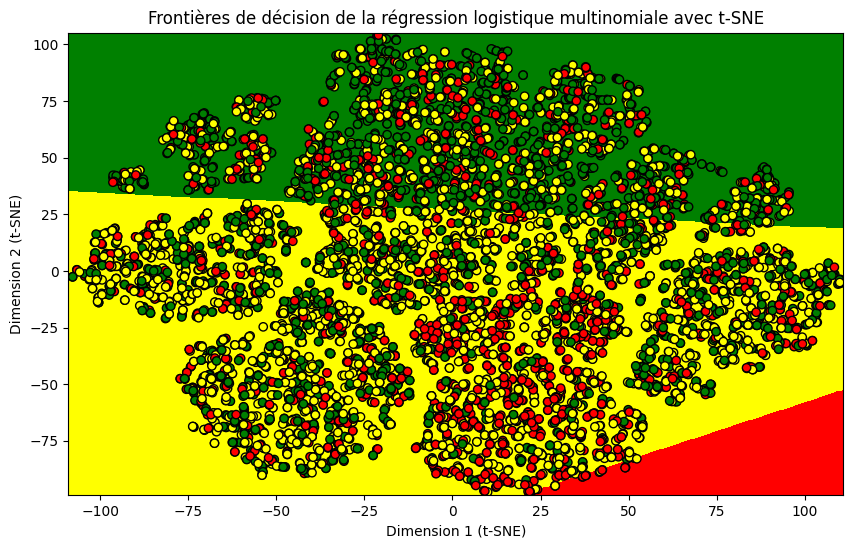

In [33]:
from matplotlib.colors import ListedColormap

# D√©finition des couleurs pour chaque classes cible
color_dict = {"Faible": "green", "Mod√©r√©": "yellow", "√âlev√©": "red"}
mesh_cmap = ListedColormap([color_dict["Faible"], color_dict["Mod√©r√©"], color_dict["√âlev√©"]])

# D√©finition de la taille de la grille pour visualiser les fronti√®res de d√©cision
mesh_size = 0.4
x_min, x_max = tsne_df['Dimension 1'].min() - 1, tsne_df['Dimension 1'].max() + 1
y_min, y_max = tsne_df['Dimension 2'].min() - 1, tsne_df['Dimension 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_size), np.arange(y_min, y_max, mesh_size))

# Pr√©dictions pour chaque point de la grille
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = best_logistic_reg.predict(grid_points)

# Convertir les labels de classe en valeurs num√©riques pour correspondre aux couleurs du graphique
label_mapping = {'Faible': 0, 'Mod√©r√©': 1, '√âlev√©': 2}
Z_numeric = np.vectorize(label_mapping.get)(Z)
Z_numeric = Z_numeric.reshape(xx.shape)

# Cr√©ation du graphique avec les fronti√®res de d√©cision et les points
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z_numeric, cmap=mesh_cmap, shading='auto')

# Utilisation de `color_vec` pour colorier les points correctement
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=color_vec, edgecolor='k')

# Ajout des labels et du titre
plt.xlabel("Dimension 1 (t-SNE)")
plt.ylabel("Dimension 2 (t-SNE)")
plt.title("Fronti√®res de d√©cision de la r√©gression logistique multinomiale avec t-SNE")
plt.show()





Nous voyons que les fronti√®res de d√©cision dans le graph de la r√©gression logistique multinomiale, sont plus lin√©aires et rectilignes que pour le mod√®le SVM avec le kernel "RBF". En outre, les fronti√®res de d√©cision sont plus rigides, divisant l'espace en larges bandes qui ne suivent pas n√©cessairement la densit√© ou la distribution des points dans l'espace t-SNE, comme nous pouvons l'observer sur la classe rouge (="Elev√©").

Ainsi, le mod√®le SVM avec kernel "RBF" offre des fronti√®res de d√©cision plus flexibles et adapt√©es aux donn√©es du t-SNE, ce qui en fait un choix plus performant pour classifier les classes cibles de "Anxiety_score".

Sauvegardons maintenant notre meilleur mod√®le :

##4.5

In [34]:
# Importation du module pickle pour sauvegarder et charger des objets Python
import pickle

# Sp√©cifiez le chemin pour sauvegarder le mod√®le
model_path = "best_svm_model.sav"

# Sauvegarde du mod√®le SVM avec kernel "RBF" et les meilleurs hyperparam√®tres
with open(model_path, "wb") as model_file_out:
    pickle.dump(best_svm, model_file_out)

print(f"Le mod√®le SVM a √©t√© sauvegard√© sous le nom de fichier : {model_path}")

# Pour charger le mod√®le sauvegard√©
with open(model_path, "rb") as model_file_in:
    best_model_loaded = pickle.load(model_file_in)

# Afficher le mod√®le charg√© pour v√©rification
print(best_model_loaded)


Le mod√®le SVM a √©t√© sauvegard√© sous le nom de fichier : best_svm_model.sav
SVC(C=8.0, gamma=0.001, max_iter=10000)
